### Data extraction, transformation and loading

In [2]:
import pandas as pd
import numpy as np
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

In [3]:
print('Starting script at: ', datetime.datetime.now())

Starting script at:  2018-04-12 12:47:26.952039


In [4]:
trainDf = pd.read_csv('Hold/training2Df.csv') 
testDf = pd.read_csv('Hold/test2Df.csv')

In [5]:
print('Data imported at: ', datetime.datetime.now())

Data imported at:  2018-04-12 12:47:38.003297


In [6]:
print('Starting analysis by user at: ', datetime.datetime.now())

Starting analysis by user at:  2018-04-12 12:47:38.009796


In [7]:
# Testing if there are any repeat purchases by concatenating user_id to product_id
# Then taking a set of this list which should remove all duplicate values which would 
# Represent reoccuring purchases. Then compared the length of the dataframes before and
# After calling Set. They are the same which suggests no repurchases occurred. 

trainDf['Id'] = trainDf['User_ID'].astype(str)+'_'+ trainDf['Product_ID'].astype(str) 
print(trainDf['Id'].count()) #prints count of all purchases

new = list(set(trainDf['Id'])) #creates a list containing a set of all purchases
print(len(new))

new.append('1001666_P00002042') #adding a duplicate value and printing length
print(len(new))

new2 = set(new) #taking a set of the list with duplicate value to confirm set removes dupes
print(len(new2))

trainDf.drop('Id', axis=1, inplace=True) # Dropping created ID field

550068
550068
550069
550068


In [8]:
# Calculating metrics by user id grouping
AveragePurchaseAmountUser = trainDf.groupby(by='User_ID')['Purchase_Amount'].mean()
TotalPurchaseAmountUsers = trainDf['Purchase_Amount'].sum()
AverageTotalPurchaseAmountUsers = trainDf.groupby(by='User_ID')['Purchase_Amount'].sum().mean()
NumberOfPurchasesUser = trainDf.groupby(by='User_ID')['Purchase_Amount'].count().sort_values(ascending=False)
AverageNumberPurchasesUsers = np.mean(NumberOfPurchasesUser)

MaxPurchaseAmountUsers = np.max(trainDf['Purchase_Amount'])
MinPurchaseAmountUsers = np.min(trainDf['Purchase_Amount'])
MaxNumberPurchasesUsers = np.max(NumberOfPurchasesUser)
MinNumberPurchasesUsers = np.min(NumberOfPurchasesUser)

NumberUniqueProductsUser = trainDf.groupby(by='User_ID')['Product_ID'].nunique().sort_values(ascending = False)
AverageNumberUnqiqueProductsUsers = np.mean(NumberUniqueProductsUser)

StatsUsers = [TotalPurchaseAmountUsers, AverageTotalPurchaseAmountUsers,AverageNumberPurchasesUsers, MaxPurchaseAmountUsers, MinPurchaseAmountUsers, MaxNumberPurchasesUsers, MinNumberPurchasesUsers, AverageNumberUnqiqueProductsUsers]
StatsUsersStr = ['TotalPurchaseAmountUsers', 'AverageTotalPurchaseAmountUsers', 'AverageNumberPurchasesUsers', 'MaxPurchaseAmountUsers', 'MinPurchaseAmountUsers', 'MaxNumberPurchasesUsers', 'MinNumberPurchasesUsers', 'AverageNumberUnqiqueProductsUsers']

StatsUser = [AveragePurchaseAmountUser, NumberOfPurchasesUser, NumberUniqueProductsUser]
StatsUserStr = ['AveragePurchaseAmountUser', 'NumberOfPurchasesUser', 'NumberUniqueProductsUser']

In [9]:
print('User purchase amount statistics')
for a, b in zip(StatsUsersStr, StatsUsers):
    print(a, ": ", b)
    
print('\n')
print('Individual purchase amount statistics:') 
print(trainDf.Purchase_Amount.describe())

User purchase amount statistics
TotalPurchaseAmountUsers :  5095812742
AverageTotalPurchaseAmountUsers :  865016.5917501273
AverageNumberPurchasesUsers :  93.37429977932439
MaxPurchaseAmountUsers :  23961
MinPurchaseAmountUsers :  12
MaxNumberPurchasesUsers :  1026
MinNumberPurchasesUsers :  6
AverageNumberUnqiqueProductsUsers :  93.37429977932439


Individual purchase amount statistics:
count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase_Amount, dtype: float64


In [10]:
# Creates a count dictionary that stores the user_ID as the key and
# a dictionary as the value. This dictionary stores the product category
# as the key and the count of each category as the value  

i = 0
users = {}

for index, row in trainDf.iterrows():    
    
    if row['User_ID'] not in users:
        users[row['User_ID']] = {}        
           
    if row['Product_Category_1'] not in users[row['User_ID']]:
        
        users[row['User_ID']][row['Product_Category_1']] = 1       
        
    else: 
        users[row['User_ID']][row['Product_Category_1']] += 1

    
    
    if row['Product_Category_2'] not in users[row['User_ID']]:
        
        users[row['User_ID']][row['Product_Category_2']] = 1
      
        
    else: 
        users[row['User_ID']][row['Product_Category_2']] += 1
   
    
    if row['Product_Category_3'] not in users[row['User_ID']]:
        
        users[row['User_ID']][row['Product_Category_3']] = 1
      
        
    else: 
        users[row['User_ID']][row['Product_Category_3']] += 1


    
# creates a dictionary that stores the count of unique product
# categories purchased in, categories with 2 or 3 purchases by a single user, 
# categories with 4 or 5 purchases by a single user or categories with 6+ purchases
# by a single user

unique_cats_user = {}
cats_two_three = {}
cats_four_five = {}
cats_six_plus = {}

i = 0
for user in users:
    unique_cats_user[user] = len(users[user]) - 1 # Minus one for category 0
    
    counter2 = 0
    counter4 = 0
    counter6 = 0
    
    for key, value in users[user].items():
                
        if value > 1 and value <= 3 and key != 0: # add key not equal to 0 to prevent 0s representing no category from being added
            counter2 += 1

        
        if value >= 4 and value <= 5 and key != 0: # add key not equal to 0 to prevent 0s representing no category from being added
            counter4 += 1
            
        if value >= 6 and key != 0: # add key not equal to 0 to prevent 0s representing no category from being added
            counter6 += 1
        
        
    cats_two_three[user] = counter2
    cats_four_five[user] = counter4
    cats_six_plus[user] = counter6

# converts above dictionaries to data frames
unq_cats_prch_user = pd.DataFrame.from_dict((unique_cats_user), orient='index')
two_three_cats_prch_user = pd.DataFrame.from_dict((cats_two_three), orient='index')
four_five_cats_prch_user = pd.DataFrame.from_dict((cats_four_five), orient='index')
cats_six_plus = pd.DataFrame.from_dict((cats_six_plus), orient='index')  

# Resets the index and column names of above data frames
unq_cats_prch_user = unq_cats_prch_user.reset_index()
unq_cats_prch_user.columns = ['User_ID', 'Unqiue_Cat_Count']
two_three_cats_prch_user = two_three_cats_prch_user.reset_index()
two_three_cats_prch_user.columns = ['User_ID', '2-3_Cat_Count']
four_five_cats_prch_user = four_five_cats_prch_user.reset_index()
four_five_cats_prch_user.columns = ['User_ID', '4-5_Cat_Count']
six_plus_cats_prch_user = cats_six_plus.reset_index()
six_plus_cats_prch_user.columns = ['User_ID', '6+_Cat_Count']

# Merges product category features created above to trainDf 
trainDf = trainDf.merge(unq_cats_prch_user, on='User_ID').merge(two_three_cats_prch_user, on ='User_ID').merge(four_five_cats_prch_user, on = 'User_ID').merge(six_plus_cats_prch_user, on ='User_ID')


In [11]:
# Calcuates average purchase and average number of purchases by user, stores in holding and adds to trainDf
avg_df = trainDf.groupby(by='User_ID')['Purchase_Amount'].mean().reset_index().rename(columns={'Purchase_Amount': 'AvgPurchaseAmount'})

numppu_df = trainDf.groupby(by='User_ID')['Purchase_Amount'].count().reset_index().rename(columns={'Purchase_Amount': 'NumberPurchasesUser'})

holding = avg_df.merge(numppu_df, on='User_ID')

trainDf = trainDf.merge(holding, on='User_ID')

In [12]:
# Creating following features by user: max purchase amount, minimum purchase amount
# stanard deviation of purchase amount, 25th percentile purchase amount, 75th percentile
# purchase amount, IQR of purchase amounts, median purchase amount
MaxPurchaseAmountUser = trainDf.groupby(by='User_ID')['Purchase_Amount'].max()
maxP = pd.DataFrame(MaxPurchaseAmountUser).reset_index().rename(columns={'Purchase_Amount': 'Max_Purchase'})

MinPurchaseAmountUser = trainDf.groupby(by='User_ID')['Purchase_Amount'].min()
minP = pd.DataFrame(MinPurchaseAmountUser).reset_index().rename(columns={'Purchase_Amount': 'Min_Purchase'})

StdPurchaseAmountUser = trainDf.groupby(by='User_ID')['Purchase_Amount'].std()
std = pd.DataFrame(StdPurchaseAmountUser).reset_index().rename(columns={'Purchase_Amount': 'Standard_Deviation'})

_25PerPurchaseAmountUser = trainDf.groupby(by='User_ID')['Purchase_Amount'].quantile(q=.25)
_25Per = pd.DataFrame(_25PerPurchaseAmountUser).reset_index().rename(columns={'Purchase_Amount': '_25th_per'})

_75PerPurchaseAmountUser = trainDf.groupby(by='User_ID')['Purchase_Amount'].quantile(q=.75)
_75Per = pd.DataFrame(_75PerPurchaseAmountUser).reset_index().rename(columns={'Purchase_Amount': '_75th_per'})

IQRPurchaseAmountUser = _75PerPurchaseAmountUser - _25PerPurchaseAmountUser
IQR = pd.DataFrame(IQRPurchaseAmountUser).reset_index().rename(columns={'Purchase_Amount': 'IQR'})

MedianPurchaseAmountUser = trainDf.groupby(by='User_ID')['Purchase_Amount'].median()
median = pd.DataFrame(MedianPurchaseAmountUser).reset_index().rename(columns={'Purchase_Amount': 'Median'})

# Stores above created features in data frame called data to be used later
data = maxP.merge(minP, on='User_ID').merge(std, on='User_ID').merge(_25Per, on='User_ID').merge(_75Per, on ='User_ID').merge(IQR, on='User_ID').merge(median, on='User_ID')

# Merges above created features to trainDf
trainDf = trainDf.merge(data, on ='User_ID')

In [13]:
trainFIC = trainDf

y = trainFIC.Purchase_Amount
x = trainFIC.drop(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation','City_Category','Stay_In_Current_City_Years', 
'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase_Amount'], axis=1)

rfr = RandomForestRegressor(n_jobs=-1, oob_score= True, random_state = 0, max_features=64)

rfr.fit(x,y)
 
importance = list(rfr.feature_importances_)
feature = list(x.columns)

feature_importance = pd.DataFrame({'Feature': feature, 'Importance': importance})

print('Feature importance determined from random forest')
print(feature_importance.sort_values('Importance', ascending=False))

Feature importance determined from random forest
                Feature  Importance
74    AvgPurchaseAmount    0.118220
43   5_Product_Category    0.041151
46   8_Product_Category    0.041109
80            _75th_per    0.035415
82               Median    0.035333
52  14_Product_Category    0.033325
39   1_Product_Category    0.033100
54  16_Product_Category    0.030696
53  15_Product_Category    0.026634
40   2_Product_Category    0.025986
78   Standard_Deviation    0.024040
77         Min_Purchase    0.022995
76         Max_Purchase    0.022978
44   6_Product_Category    0.022813
79            _25th_per    0.021925
75  NumberPurchasesUser    0.020147
81                  IQR    0.019396
55  17_Product_Category    0.018800
49  11_Product_Category    0.018722
42   4_Product_Category    0.014262
51  13_Product_Category    0.013843
73         6+_Cat_Count    0.012973
50  12_Product_Category    0.012066
71        2-3_Cat_Count    0.011570
35             Stay_1yr    0.011519
47   9_Product_

/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


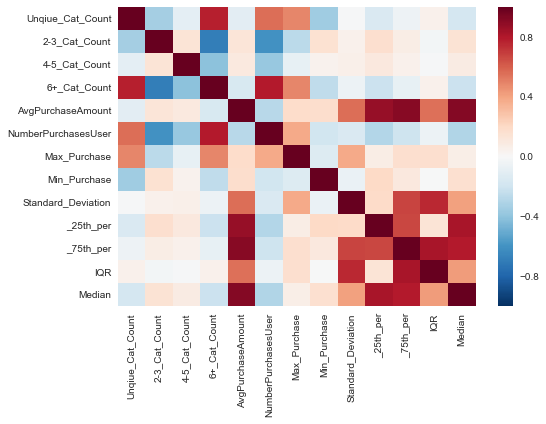

In [14]:
# Plotting a heat matrix to identify if correlation between 
# Added features

plt.gcf().clear()

Corr = x.iloc[:,70:].corr()
sns.heatmap(Corr)
plt.show()

In [15]:
print(Corr)

                     Unqiue_Cat_Count  2-3_Cat_Count  4-5_Cat_Count  \
Unqiue_Cat_Count             1.000000      -0.342298      -0.094279   
2-3_Cat_Count               -0.342298       1.000000       0.135426   
4-5_Cat_Count               -0.094279       0.135426       1.000000   
6+_Cat_Count                 0.780657      -0.693939      -0.413161   
AvgPurchaseAmount           -0.103939       0.129961       0.094392   
NumberPurchasesUser          0.558088      -0.603049      -0.379283   
Max_Purchase                 0.489828      -0.270502      -0.083481   
Min_Purchase                -0.352499       0.154297       0.046017   
Standard_Deviation          -0.008713       0.053761       0.059576   
_25th_per                   -0.155961       0.164633       0.102938   
_75th_per                   -0.047847       0.070442       0.051932   
IQR                          0.054284      -0.030749      -0.008719   
Median                      -0.177621       0.145446       0.078603   

     

In [16]:
x.drop(['6+_Cat_Count', '_25th_per', '_75th_per', 'Median', 'IQR'], axis=1, inplace=True)

In [17]:
rfr = RandomForestRegressor(n_jobs=-1, oob_score= True, random_state = 0, max_features=64)

rfr.fit(x,y)
 
importance = list(rfr.feature_importances_)
feature = list(x.columns)

feature_importance = pd.DataFrame({'Feature': feature, 'Importance': importance})

print('Feature importance determined from random forest')
print(feature_importance.sort_values('Importance', ascending=False))

Feature importance determined from random forest
                Feature  Importance
73    AvgPurchaseAmount    0.153913
77   Standard_Deviation    0.046095
43   5_Product_Category    0.040919
46   8_Product_Category    0.040571
75         Max_Purchase    0.037892
76         Min_Purchase    0.036545
74  NumberPurchasesUser    0.035015
39   1_Product_Category    0.033082
52  14_Product_Category    0.032641
54  16_Product_Category    0.030509
53  15_Product_Category    0.026724
40   2_Product_Category    0.025537
44   6_Product_Category    0.021450
49  11_Product_Category    0.018890
71        2-3_Cat_Count    0.018650
55  17_Product_Category    0.018507
70     Unqiue_Cat_Count    0.017341
72        4-5_Cat_Count    0.016896
42   4_Product_Category    0.014399
51  13_Product_Category    0.013415
50  12_Product_Category    0.011935
35             Stay_1yr    0.011837
47   9_Product_Category    0.011285
32      City_Category_B    0.010457
36             Stay_2yr    0.010098
41   3_Product_

/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


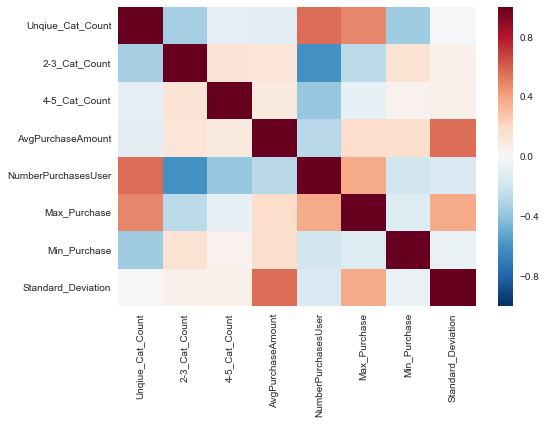

In [18]:
# Plotting a heat matrix to identify if correlation between 
# Added features

plt.gcf().clear()

Corr = x.iloc[:,70:].corr()
sns.heatmap(Corr)
plt.show()

In [19]:
print(Corr)

                     Unqiue_Cat_Count  2-3_Cat_Count  4-5_Cat_Count  \
Unqiue_Cat_Count             1.000000      -0.342298      -0.094279   
2-3_Cat_Count               -0.342298       1.000000       0.135426   
4-5_Cat_Count               -0.094279       0.135426       1.000000   
AvgPurchaseAmount           -0.103939       0.129961       0.094392   
NumberPurchasesUser          0.558088      -0.603049      -0.379283   
Max_Purchase                 0.489828      -0.270502      -0.083481   
Min_Purchase                -0.352499       0.154297       0.046017   
Standard_Deviation          -0.008713       0.053761       0.059576   

                     AvgPurchaseAmount  NumberPurchasesUser  Max_Purchase  \
Unqiue_Cat_Count             -0.103939             0.558088      0.489828   
2-3_Cat_Count                 0.129961            -0.603049     -0.270502   
4-5_Cat_Count                 0.094392            -0.379283     -0.083481   
AvgPurchaseAmount             1.000000            -0

In [20]:
# Creates a count dictionary that stores the user_ID as the key and
# a dictionary as the value. This dictionary stores the product category
# as the key and the count of each category as the value  

i = 0
users = {}

for index, row in testDf.iterrows():    
    
    if row['User_ID'] not in users:
        
        users[row['User_ID']] = {}        
           
    if row['Product_Category_1'] not in users[row['User_ID']]:
        
        users[row['User_ID']][row['Product_Category_1']] = 1
        
    else: 
        users[row['User_ID']][row['Product_Category_1']] += 1
    
    
    if row['Product_Category_2'] not in users[row['User_ID']]:
        
        users[row['User_ID']][row['Product_Category_2']] = 1
        
    else: 
        users[row['User_ID']][row['Product_Category_2']] += 1
    
    if row['Product_Category_3'] not in users[row['User_ID']]:
        
        users[row['User_ID']][row['Product_Category_3']] = 1
        
    else: 
        users[row['User_ID']][row['Product_Category_3']] += 1       
    
# creates a dictionary that stores the count of unique product categories purchased 
# in by a single user, categories with 2 or 3 purchases by single user, categories 
# with 4 or 5 purchases by single user and categories with 6+ purchases by a single user

unique_cats_user = {}
cats_two_three = {}
cats_four_five = {}
cats_six_plus = {}

i = 0
for user in users:
    unique_cats_user[user] = len(users[user]) - 1 # Minus one for category 0
    
    counter2 = 0
    counter4 = 0
    counter6 = 0
    
    for key, value in users[user].items():
                
        if value > 1 and value <= 3 and key != 0: # add key not equal to 0 to prevent 0s representing no category from being added
            counter2 += 1

        
        if value >= 4 and value <= 5 and key != 0: # add key not equal to 0 to prevent 0s representing no category from being added
            counter4 += 1
            
        if value >= 6 and key != 0: # add key not equal to 0 to prevent 0s representing no category from being added
            counter6 += 1
        
        
    cats_two_three[user] = counter2
    cats_four_five[user] = counter4
    cats_six_plus[user] = counter6

# converts above dictionaries to data frames
unq_cats_prch_user = pd.DataFrame.from_dict((unique_cats_user), orient='index')
two_three_cats_prch_user = pd.DataFrame.from_dict((cats_two_three), orient='index')
four_five_cats_prch_user = pd.DataFrame.from_dict((cats_four_five), orient='index')
cats_six_plus = pd.DataFrame.from_dict((cats_six_plus), orient='index')  

# Resets the index and column names of above data frames
unq_cats_prch_user = unq_cats_prch_user.reset_index()
unq_cats_prch_user.columns = ['User_ID', 'Unqiue_Cat_Count']
two_three_cats_prch_user = two_three_cats_prch_user.reset_index()
two_three_cats_prch_user.columns = ['User_ID', '2-3_Cat_Count']
four_five_cats_prch_user = four_five_cats_prch_user.reset_index()
four_five_cats_prch_user.columns = ['User_ID', '4-5_Cat_Count']
six_plus_cats_prch_user = cats_six_plus.reset_index()
six_plus_cats_prch_user.columns = ['User_ID', '6+_Cat_Count']

# Merges above created product category features to testDf
testDf = testDf.merge(unq_cats_prch_user, on='User_ID').merge(two_three_cats_prch_user, on ='User_ID').merge(four_five_cats_prch_user, on = 'User_ID').merge(six_plus_cats_prch_user, on ='User_ID')

In [21]:
#Merges average user purchase amount and number of purchases from train data to test data by user ID
testDf = testDf.merge(holding, on='User_ID')
testDf = testDf.merge(data, on='User_ID')

In [22]:
# Drops highly correlated features with the lowest importance
test = testDf.drop(['6+_Cat_Count', '_25th_per', '_75th_per', 'Median', 'IQR'], axis=1)
train = trainDf.drop(['6+_Cat_Count', '_25th_per', '_75th_per', 'Median', 'IQR'], axis=1)

In [23]:
# Writes trainDf and testDf to csv files to be used in modeling later, because
# the rest of this notebook does not change or add features for modeling purposes 
train.to_csv('Hold/trainDfStats.csv', index=False)
test.to_csv('Hold/testDfStats.csv', index=False)

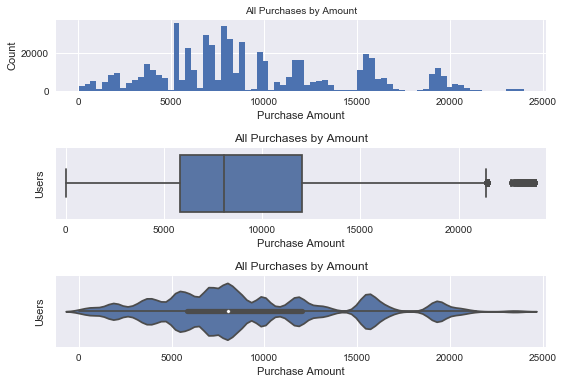

In [24]:
plt.gcf().clear()

plt.subplot(3,1,1)
# Histogram of individual purchase amounts of users
trainDf['Purchase_Amount'].hist(bins=75)
plt.xlabel('Purchase Amount')
plt.ylabel('Count')
plt.title('All Purchases by Amount', fontsize = 10)

# Box and whiskers of individual purchase amount of users
plt.subplot(3,1,2)
sns.boxplot(x = 'Purchase_Amount', data=trainDf)
plt.xlabel('Purchase Amount')
plt.ylabel('Users')
plt.title('All Purchases by Amount')
plt.margins(.02)

# Violin plot of individual purchase amount of users
plt.subplot(3,1,3)
sns.violinplot( x='Purchase_Amount', data=trainDf)
plt.title('All Purchases by Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Users')
plt.margins(.02)

plt.tight_layout()
plt.show()

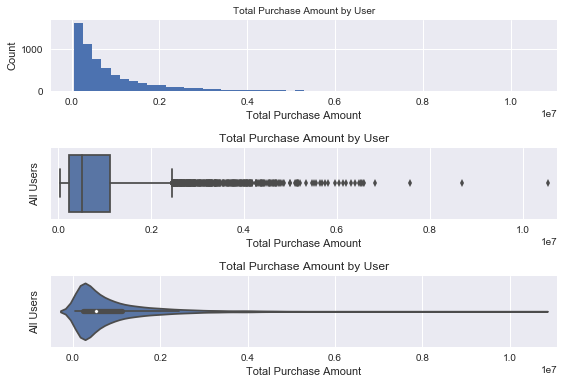

In [25]:
# Aggrating purchases by user
hold = trainDf.groupby('User_ID')['Purchase_Amount'].sum()
hold = hold.to_frame().reset_index().rename(columns={'Purchase_Amount': 'TotalPurchaseAmount'})
holdDf = trainDf
hold = pd.merge(hold, holdDf, on='User_ID', how='outer')
hold = hold.groupby('User_ID')['TotalPurchaseAmount'].mean()
hold = hold.to_frame().reset_index().rename(columns={'Purchase_Amount': 'TotalPurchaseAmount'})

plt.gcf().clear()

# Histogram of total purchase amount by user
plt.subplot(3,1,1)
hold['TotalPurchaseAmount'].hist(bins=50)
plt.xlabel('Total Purchase Amount')
plt.ylabel('Count')
plt.title('Total Purchase Amount by User', fontsize = 10)

# Box and whiskers of total purchase amount by user
plt.subplot(3,1,2)
sns.boxplot(x = 'TotalPurchaseAmount', data= hold)
plt.xlabel('Total Purchase Amount')
plt.ylabel('All Users')
plt.title('Total Purchase Amount by User')
plt.margins(.02)

# Violin plot of total purchase amount by user
plt.subplot(3,1,3)
sns.violinplot(x = 'TotalPurchaseAmount', data= hold)
plt.title('Total Purchase Amount by User')
plt.xlabel('Total Purchase Amount')
plt.ylabel('All Users')
plt.margins(.02)

plt.tight_layout()
plt.show()

In [26]:
print('Total purchase amount by user statistics: ', hold['TotalPurchaseAmount'].describe(),'\n')

Total purchase amount by user statistics:  count    5.891000e+03
mean     8.650166e+05
std      9.436445e+05
min      4.668100e+04
25%      2.376780e+05
50%      5.212130e+05
75%      1.119250e+06
max      1.053691e+07
Name: TotalPurchaseAmount, dtype: float64 



In [27]:
print('Starting product category calculations at: ',  datetime.datetime.now())

Starting product category calculations at:  2018-04-12 12:53:52.696462


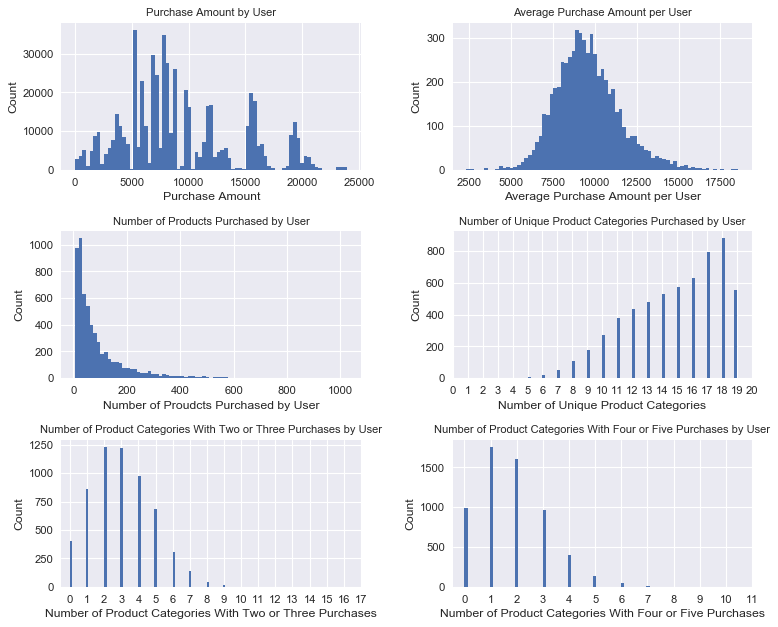

In [28]:
# Plots the following: purchase about per user, average purchase amount 
# per user, number of purchases per user, number of unique categories 
# purchased in per user, number of 2 or 3 categories purchased per user, number 
# of 4 or 5 categories purchased per user and number of categories with 
# 6+ categories purchased per user

plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.gcf().clear()

# Purchase amount by user
plt.subplot(3,2,1)
trainDf['Purchase_Amount'].hist(bins=75)
plt.xlabel('Purchase Amount')
plt.ylabel('Count')
plt.title('Purchase Amount by User', fontsize = 10)

# Histogram of average purchase amount by user
plt.subplot(3,2,2)
trainDf.groupby(by='User_ID')['AvgPurchaseAmount'].mean().hist(bins=75)
plt.xlabel('Average Purchase Amount per User')
plt.ylabel('Count')
plt.title('Average Purchase Amount per User', fontsize = 10)

# Total number of purchases by user
plt.subplot(3,2,3)
trainDf.groupby(by='User_ID')['NumberPurchasesUser'].mean().hist(bins=75)
plt.xlabel('Number of Proudcts Purchased by User')
plt.ylabel('Count')
plt.title('Number of Products Purchased by User', fontsize = 10)

# Number of unique categories purchased per user
plt.subplot(3,2,4)
trainDf.groupby(by='User_ID')['Unqiue_Cat_Count'].mean().hist(bins=75)
plt.xlabel('Number of Unique Product Categories')
x = range(0,21)
plt.xticks(x)
plt.ylabel('Count')
plt.title('Number of Unique Product Categories Purchased by User', fontsize = 10)

# Number of unique categories purchased per user
plt.subplot(3,2,5)
trainDf.groupby(by='User_ID')['2-3_Cat_Count'].mean().hist(bins=75)
plt.xlabel('Number of Product Categories With Two or Three Purchases')
x = range(0,18)
plt.xticks(x)
plt.ylabel('Count')
plt.title('Number of Product Categories With Two or Three Purchases by User', fontsize = 10)

# Number of unique categories purchased per user
plt.subplot(3,2,6)
trainDf.groupby(by='User_ID')['4-5_Cat_Count'].mean().hist(bins=75)
plt.xlabel('Number of Product Categories With Four or Five Purchases')
x = range(0,12)
plt.xticks(x)
plt.ylabel('Count')
plt.title('Number of Product Categories With Four or Five Purchases by User', fontsize = 10)

plt.tight_layout()


plt.show()

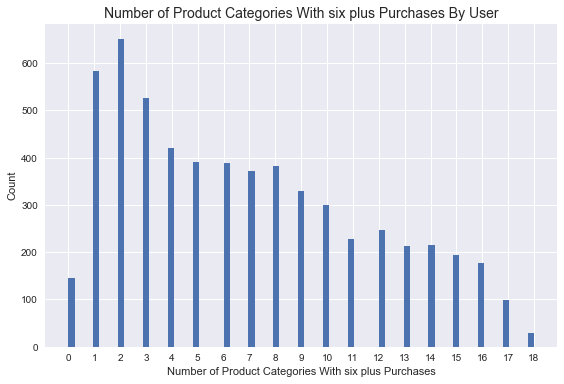

In [29]:
plt.gcf().clear()

# Number of Product Categories With six plus Purchases By User
trainDf.groupby(by='User_ID')['6+_Cat_Count'].mean().hist(bins=75)
plt.xlabel('Number of Product Categories With six plus Purchases')
x = range(0,19)
plt.xticks(x)
plt.ylabel('Count')
plt.title('Number of Product Categories With six plus Purchases By User', fontsize = 14)

plt.tight_layout()
plt.show()

In [30]:
plt.subplot(2,2,3)
sns.regplot(trainDf['Purchase_Amount'], trainDf['NumberPurchasesUser'])
plt.xlabel('Number of Purchases per User')
plt.ylabel('Total Purchase Amount per User')
plt.title('Number of Purchases per User Vs Total Purchase Amount per User')

plt.subplot(2,2,4)
sns.regplot(trainDf['AvgPurchaseAmount'], trainDf['Purchase_Amount'], marker='.')

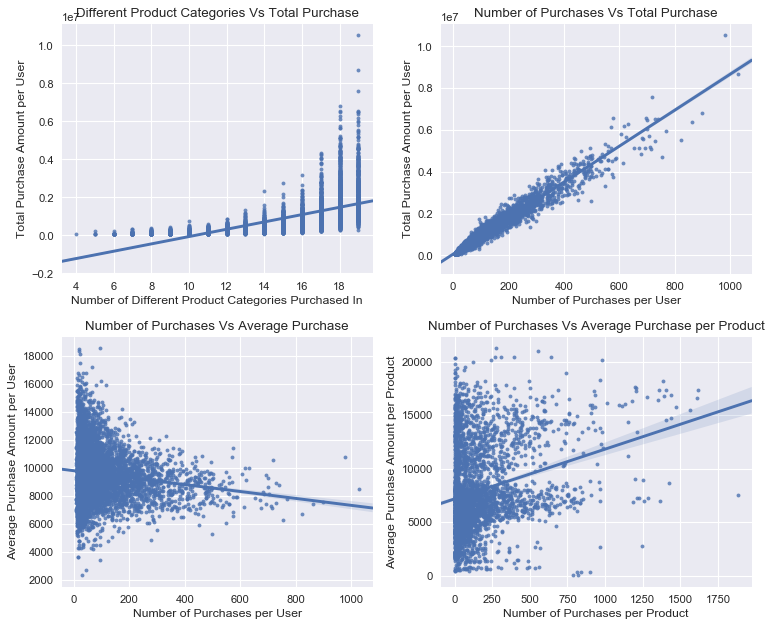

In [31]:
# Line of best fit plots between purchase amount and numeric variables             
plt.gcf().clear()

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

diffCats = trainDf.groupby('User_ID')['Unqiue_Cat_Count'].mean()
numPurch = trainDf.groupby('User_ID')['NumberPurchasesUser'].mean()
totalPurch = trainDf.groupby('User_ID')['Purchase_Amount'].sum()
avgPurch = trainDf.groupby('User_ID')['Purchase_Amount'].mean()
numPurchP = trainDf.groupby('Product_ID')['Purchase_Amount'].count()
avgPurchP = trainDf.groupby('Product_ID')['Purchase_Amount'].mean()

# Regplot of total purchase amount per user and unique category count per user
plt.subplot(2,2,1)
sns.regplot(diffCats, totalPurch, marker='.')
plt.xlabel('Number of Different Product Categories Purchased In')
plt.ylabel('Total Purchase Amount per User')
plt.title('Different Product Categories Vs Total Purchase')

# Regplot of total purchase amount per user and total number of purchases per user
plt.subplot(2,2,2)
sns.regplot(numPurch, totalPurch, marker='.')
plt.xlabel('Number of Purchases per User')
plt.ylabel('Total Purchase Amount per User')
plt.title('Number of Purchases Vs Total Purchase')

# Number of purchases vs average purchase per user
plt.subplot(2,2,3)
sns.regplot(numPurch, avgPurch, marker='.')
plt.xlabel('Number of Purchases per User')
plt.ylabel('Average Purchase Amount per User')
plt.title('Number of Purchases Vs Average Purchase')

# Number of purchases per product vs average purchase per product
plt.subplot(2,2,4)
sns.regplot(numPurchP, avgPurchP, marker='.')
plt.xlabel('Number of Purchases per Product')
plt.ylabel('Average Purchase Amount per Product')
plt.title('Number of Purchases Vs Average Purchase per Product')

plt.tight_layout()
plt.show()

In [32]:
print('Starting analysis by gender at: ',  datetime.datetime.now())

Starting analysis by gender at:  2018-04-12 12:56:05.717344


In [33]:
# Calculating metrics by gender grouping
gender = trainDf.columns[12:14]

genderDfs = {}
genderLst = []

for item in gender:
    genderDfs[item] = trainDf[trainDf[item]==1]
    genderLst.append(trainDf[trainDf[item]==1])
    
genderStats = {}

for key, value in genderDfs.items():
    #loop through each gender data frame
    #print(key, "\n \n", value.head())
    
    temps = {}
    
    temps['AveragePurchaseAmount'] = np.mean(value['Purchase_Amount'])
    
    temps['TotalPurchaseAmount'] = value.Purchase_Amount.sum()

    temps['NumberPurchases'] = value.Purchase_Amount.count()

    temps['AverageNumberPurchases'] = np.mean(value.groupby(by='User_ID')['Purchase_Amount'].count())

    temps['AverageTotalPurchaseAmount'] = value.groupby(by='User_ID')['Purchase_Amount'].sum().mean()

    temps['MaxPurchaseAmountUsers'] = np.max(value['Purchase_Amount'])
    
    temps['MinPurchaseAmountUsers'] = np.min(value['Purchase_Amount'])
    
    temps['MaxNumberPurchasesUsers'] = np.max(value.groupby(by='User_ID')['Purchase_Amount'].count())
    
    temps['MinNumberPurchasesUsers'] = np.min(value.groupby(by='User_ID')['Purchase_Amount'].count())
    
    
    genderStats[key] = temps
       
i = 0

for key, value in genderStats.items():
    print("Statistics for purchases by: ", key, "\n")
    
    print(genderLst[i].Purchase_Amount.describe(), "\n")
    i += 1
    
    
    for k, v in value.items():
        print(k, ": ", v)
    print('\n')
    

Statistics for purchases by:  Female 

count    135809.000000
mean       9229.392065
std        5056.819872
min          12.000000
25%        5472.000000
50%        8041.000000
75%       12049.000000
max       23961.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  9229.39206532704
TotalPurchaseAmount :  1253434507
NumberPurchases :  135809
AverageNumberPurchases :  23.52078281953585
AverageTotalPurchaseAmount :  217082.52632490476
MaxPurchaseAmountUsers :  23961
MinPurchaseAmountUsers :  12
MaxNumberPurchasesUsers :  344
MinNumberPurchasesUsers :  1


Statistics for purchases by:  Male 

count    414259.000000
mean       9275.304182
std        5011.904194
min          12.000000
25%        5834.000000
50%        8049.000000
75%       12055.000000
max       23961.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  9275.30418168344
TotalPurchaseAmount :  3842378235
NumberPurchases :  414259
AverageNumberPurchases :  70.32065863181124
AverageTotal

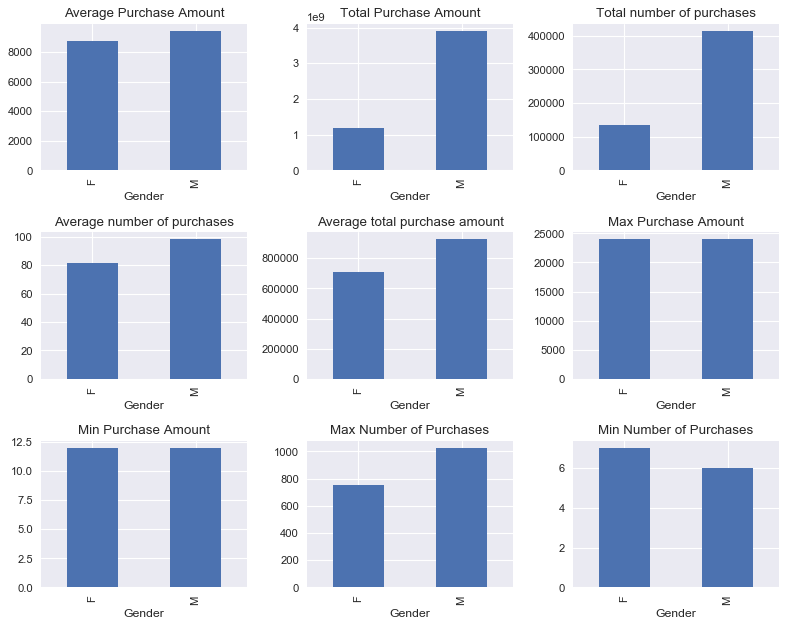

In [34]:
plt.gcf().clear()

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

#Plots Average Purchase Amount By Gender
plt.subplot(3,3,1)
df = trainDf.groupby(by='Gender')['Purchase_Amount'].mean()
df.plot(kind='bar', title='Average Purchase Amount')

#Plots Total Purchase Amount By Gender
plt.subplot(3,3,2)
df = trainDf.groupby(by='Gender')['Purchase_Amount'].sum()
df.plot(kind='bar', title = 'Total Purchase Amount')

#Plots Total Number of Purchases By Gender
plt.subplot(3,3,3)
df = trainDf.groupby(by=['Gender'])['Purchase_Amount'].count()
df.plot(kind='bar', title = 'Total number of purchases')

#Plots Average Number of Purchases By Gender
plt.subplot(3,3,4)
tempDf = trainDf
df0 = trainDf.groupby(by='User_ID')['Purchase_Amount'].count().to_frame().reset_index()
df0.columns = ["User_ID", 'NumberPurchaseCount']
df1 = tempDf.merge(df0, on='User_ID')
df2 = df1.groupby(by = ["Gender","User_ID"])['NumberPurchaseCount'].mean()
df3 = df2.groupby('Gender').mean()
df3.plot(kind='bar', title ='Average number of purchases')

#Plots Average Total Purchase Amount By Gender
plt.subplot(3,3,5)
df = trainDf.groupby(by=['Gender','User_ID'])['Purchase_Amount'].sum()
df2 = df.groupby(by='Gender').mean()
df2.plot(kind='bar', title='Average total purchase amount')

#Plots Maximumn Purchase Amount By Gender
plt.subplot(3,3,6)
df = trainDf.groupby('Gender')['Purchase_Amount'].max()
df.plot(kind='bar', title='Max Purchase Amount')

#Plots Minimum Purchase Amount by Gender
plt.subplot(3,3,7)
df = trainDf.groupby('Gender')['Purchase_Amount'].min()
df.plot(kind='bar', title='Min Purchase Amount')

#Plots Maximumn Number of Purchases By Gender
plt.subplot(3,3,8)
df = trainDf.groupby(by = ['Gender','User_ID'])['Purchase_Amount'].count()
df1 = df.groupby('Gender').max()
df1.plot(kind='bar', title='Max Number of Purchases')

#Plots Minimum Number of Purchases By Gender
plt.subplot(3,3,9)
df = trainDf.groupby(by = ['Gender','User_ID'])['Purchase_Amount'].count()
df1 = df.groupby('Gender').min()
df1.plot(kind='bar', title='Min Number of Purchases')

plt.tight_layout()
plt.show()

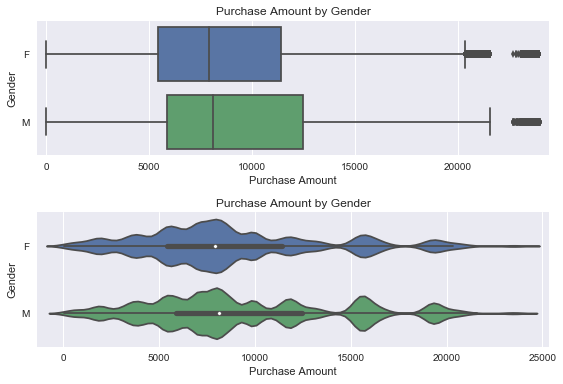

In [35]:
plt.gcf().clear()

#Box and whiskers of purchase amount by gender
plt.subplot(2,1,1)
sns.boxplot(x = 'Purchase_Amount', y ='Gender', data=trainDf)
plt.xlabel('Purchase Amount')
plt.ylabel('Gender')
plt.title('Purchase Amount by Gender')
plt.margins(.02)

#Violinplot of purchase amount by gender
plt.subplot(2,1,2)
sns.violinplot( x='Purchase_Amount', y='Gender', data=trainDf)
plt.title('Purchase Amount by Gender')
plt.ylabel('Gender')
plt.xlabel('Purchase Amount')
plt.margins(.02)

plt.tight_layout()
plt.show()

In [36]:
hold = trainDf.groupby('User_ID')['Purchase_Amount'].sum()
hold = hold.to_frame().reset_index().rename(columns={'Purchase_Amount': 'TotalPurchaseAmount'})
holdDf = trainDf
hold = pd.merge(hold, holdDf, on='User_ID', how='outer')
hold = hold.groupby(['User_ID', 'Gender'])['TotalPurchaseAmount'].mean()
hold = hold.to_frame().reset_index().rename(columns={'Purchase_Amount': 'TotalPurchaseAmount'})

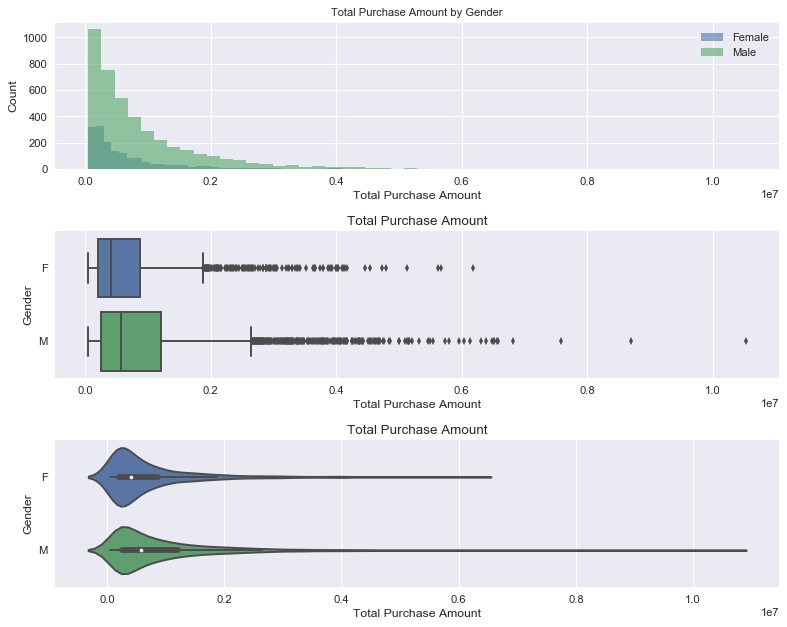

In [37]:
plt.gcf().clear()
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

#Total Purchase amount plotted
plt.subplot(3,1,1)
hold.groupby('Gender')['TotalPurchaseAmount'].hist(bins=50, alpha=.6)
plt.xlabel('Total Purchase Amount')
plt.ylabel('Count')
plt.legend(['Female', 'Male'], loc = 'upper right')
plt.title('Total Purchase Amount by Gender', fontsize = 10)

#Box and whiskers of purchase amount
plt.subplot(3,1,2)
sns.boxplot(x = 'TotalPurchaseAmount', y='Gender', data= hold)
plt.xlabel('Total Purchase Amount')
plt.ylabel('Gender')
plt.title('Total Purchase Amount')

#Violin plot of purchase amount
plt.subplot(3,1,3)
sns.violinplot(x = 'TotalPurchaseAmount', y='Gender', data= hold)
plt.title('Total Purchase Amount')
plt.xlabel('Total Purchase Amount')

plt.tight_layout()
plt.show()

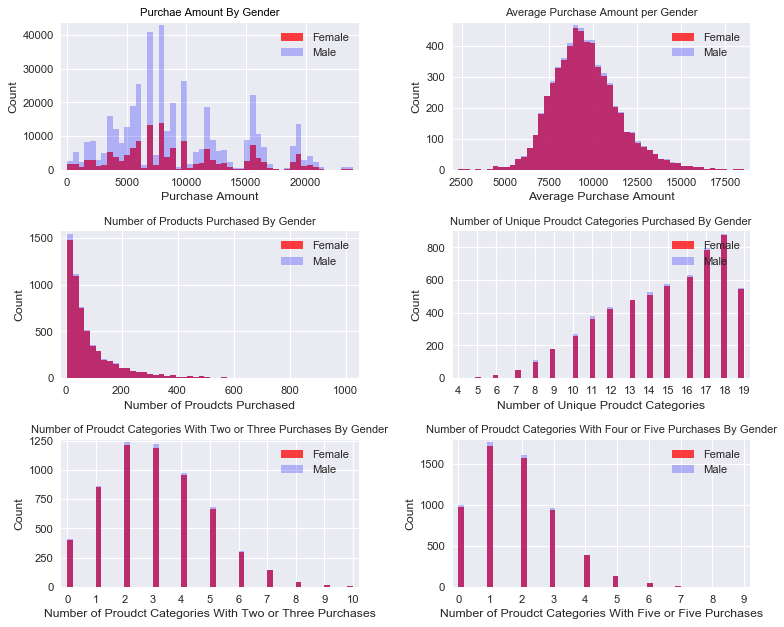

In [38]:
plt.gcf().clear()

colors = ['red', 'blue']
alpha = [.75, .25]

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='white', edgecolor='k')

plt.gcf().clear()

i = 0
for key, value in genderDfs.items():
    
    #Purchase amount by gender
    plt.subplot(3,2,1)
    value['Purchase_Amount'].hist(bins = 50, alpha= alpha[i], label = key, color = colors[i])
    plt.xlabel('Purchase Amount')
    plt.ylabel('Count')
    plt.title('Purchae Amount By Gender',color='black', fontsize = 10)
    plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Average purchase amount by gender
    plt.subplot(3,2,2)
    value.groupby(by='User_ID')['AvgPurchaseAmount'].mean().hist(bins = 50, alpha= alpha[i], label = key, color = colors[i])
    plt.xlabel('Average Purchase Amount')
    plt.ylabel('Count')
    plt.title('Average Purchase Amount per Gender', fontsize = 10)
    plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Total number of purchases by gender
    plt.subplot(3,2,3)
    value.groupby(by='User_ID')['NumberPurchasesUser'].mean().hist(bins = 50, alpha= alpha[i], label = key, color = colors[i])
    plt.xlabel('Number of Proudcts Purchased')
    plt.ylabel('Count')
    plt.title('Number of Products Purchased By Gender', fontsize = 10)
    plt.legend(loc = 'upper right')
    plt.margins(.02)

    # Number of unique categories purchased by gender
    plt.subplot(3,2,4)
    value.groupby(by='User_ID')['Unqiue_Cat_Count'].mean().hist(bins = 50, alpha= alpha[i], label = key, color = colors[i])
    plt.xlabel('Number of Unique Proudct Categories')
    x = range(0,20)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Unique Proudct Categories Purchased By Gender', fontsize = 10)
    plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Number of categories with two or more purchases by gender
    plt.subplot(3,2,5)
    value.groupby(by='User_ID')['2-3_Cat_Count'].mean().hist(bins = 50, alpha= alpha[i], label = key, color = colors[i])
    plt.xlabel('Number of Proudct Categories With Two or Three Purchases')
    x = range(0,18)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Proudct Categories With Two or Three Purchases By Gender', fontsize = 10)
    plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Number of categories with five or more purchases by gender
    plt.subplot(3,2,6)
    value.groupby(by='User_ID')['4-5_Cat_Count'].mean().hist(bins = 50, alpha= alpha[i], label = key, color = colors[i])
    plt.xlabel('Number of Proudct Categories With Five or Five Purchases')
    x = range(0,12)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Proudct Categories With Four or Five Purchases By Gender', fontsize = 10)
    plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    plt.tight_layout()
    i +=1

plt.show()

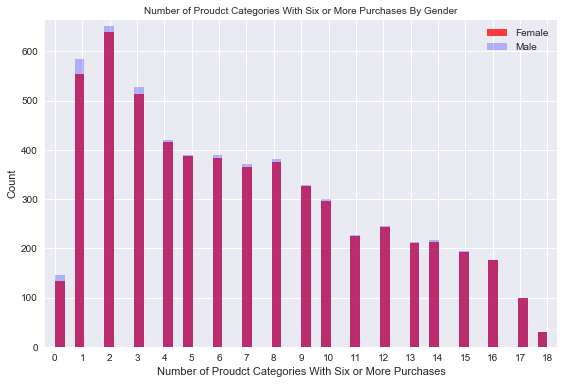

In [39]:
plt.gcf().clear()

colors = ['red', 'blue']
alpha = [.75, .25]
i=0

for key, value in genderDfs.items():

#Number of categories with 6 or more purchases by gender
    value.groupby(by='User_ID')['6+_Cat_Count'].mean().hist(bins = 50, color=colors[i], label=key, alpha=alpha[i])
    plt.xlabel('Number of Proudct Categories With Six or More Purchases')
    x = range(0,19)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Proudct Categories With Six or More Purchases By Gender', fontsize = 10)
    plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    plt.tight_layout()
    i +=1

plt.show()

In [40]:
print('Starting analysis by age at: ',  datetime.datetime.now())

Starting analysis by age at:  2018-04-12 12:56:27.731991


In [41]:
ages = trainDf.columns[14:21]

ageDfs = {}
agelst = []

for item in ages:
    ageDfs[item] = trainDf[trainDf[item]==1]
    agelst.append(trainDf[trainDf[item]==1])

ageStats = {}    
    
for key, value in ageDfs.items():
    
    temps = {}

    temps['AveragePurchaseAmount'] = np.mean(value['Purchase_Amount'])

    temps['TotalPurchaseAmount'] = value.Purchase_Amount.sum()

    temps['NumberPurchases'] = value.Purchase_Amount.count()

    temps['AverageNumberPurchases'] = np.mean(value.groupby(by='User_ID')['Purchase_Amount'].count())

    temps['AverageTotalPurchaseAmount'] = value.groupby(by='User_ID')['Purchase_Amount'].sum().mean()
   
    temps['MaxPurchaseAmountUsers'] = np.max(value['Purchase_Amount'])
    
    temps['MinPurchaseAmountUsers'] = np.min(value['Purchase_Amount'])
    
    temps['MaxNumberPurchasesUsers'] = np.max(value.groupby(by='User_ID')['Purchase_Amount'].count())
    
    temps['MinNumberPurchasesUsers'] = np.min(value.groupby(by='User_ID')['Purchase_Amount'].count())

    ageStats[key] = temps

i = 0

for key, value in ageStats.items():
    
    print('Purchase statistics by age group: ', key, "\n")
    print(agelst[i].Purchase_Amount.describe(), "\n")
    i += 1
    
    for k, v in value.items():
        print(k, ": ", v)
    print('\n')   
        

Purchase statistics by age group:  Age_0-17 

count    15102.000000
mean      9202.106807
std       4971.306749
min         12.000000
25%       5728.000000
50%       8026.500000
75%      11992.750000
max      23961.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  9202.106807045424
TotalPurchaseAmount :  138970217
NumberPurchases :  15102
AverageNumberPurchases :  7.7090352220520675
AverageTotalPurchaseAmount :  70939.36549259827
MaxPurchaseAmountUsers :  23961
MinPurchaseAmountUsers :  12
MaxNumberPurchasesUsers :  91
MinNumberPurchasesUsers :  1


Purchase statistics by age group:  Age_18-25 

count    99660.000000
mean      9320.811549
std       4972.650225
min         12.000000
25%       5883.750000
50%       8058.000000
75%      12063.000000
max      23961.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  9320.81154926751
TotalPurchaseAmount :  928912079
NumberPurchases :  99660
AverageNumberPurchases :  18.28623853211009
AverageTotalPur

In [42]:
df.plot?

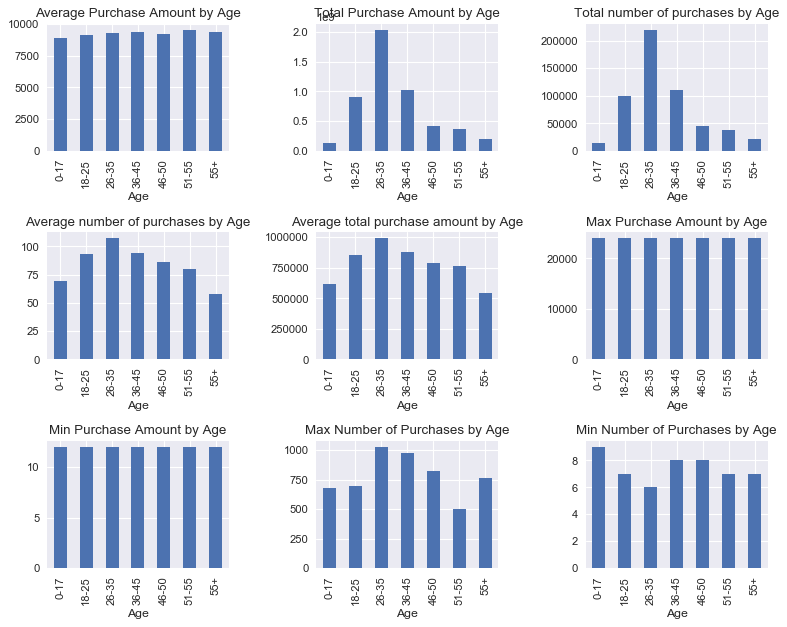

In [43]:
plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.gcf().clear()

#Plots Average Purchase Amount By age
plt.subplot(3,3,1)
df = trainDf.groupby(by='Age')['Purchase_Amount'].mean()
df.plot(kind='bar', title='Average Purchase Amount by Age')

#Plots Total Purchase Amount By age
plt.subplot(3,3,2)
df = trainDf.groupby(by='Age')['Purchase_Amount'].sum()
df.plot(kind='bar', title = 'Total Purchase Amount by Age')

#Plots Total Number of Purchases By age
plt.subplot(3,3,3)
df = trainDf.groupby(by=['Age'])['Purchase_Amount'].count()
df.plot(kind='bar', title = 'Total number of purchases by Age')

#Plots Average Number of Purchases By age
plt.subplot(3,3,4)
tempDf = trainDf
df0 = trainDf.groupby(by='User_ID')['Purchase_Amount'].count().to_frame().reset_index()
df0.columns = ["User_ID", 'NumberPurchaseCount']
df1 = tempDf.merge(df0, on='User_ID')
df2 = df1.groupby(by = ["Age","User_ID"])['NumberPurchaseCount'].mean()
df3 = df2.groupby('Age').mean()
df3.plot(kind='bar', title ='Average number of purchases by Age')

#Plots Average Total Purchase Amount By age
plt.subplot(3,3,5)
df = trainDf.groupby(by=['Age','User_ID'])['Purchase_Amount'].sum()
df2 = df.groupby(by='Age').mean()
df2.plot(kind='bar', title='Average total purchase amount by Age')

#Plots Maximumn Purchase Amount By age
plt.subplot(3,3,6)
df = trainDf.groupby('Age')['Purchase_Amount'].max()
df.plot(kind='bar', title='Max Purchase Amount by Age')

#Plots Minimum Purchase Amount by age
plt.subplot(3,3,7)
df = trainDf.groupby('Age')['Purchase_Amount'].min()
df.plot(kind='bar', title='Min Purchase Amount by Age')

#Plots Maximumn Number of Purchases By age
plt.subplot(3,3,8)
df = trainDf.groupby(by = ['Age','User_ID'])['Purchase_Amount'].count()
df1 = df.groupby('Age').max()
df1.plot(kind='bar', title='Max Number of Purchases by Age')

#Plots Minimum Number of Purchases By age
plt.subplot(3,3,9)
df = trainDf.groupby(by = ['Age','User_ID'])['Purchase_Amount'].count()
df1 = df.groupby('Age').min()
df1.plot(kind='bar', title='Min Number of Purchases by Age')

plt.tight_layout()
plt.show()

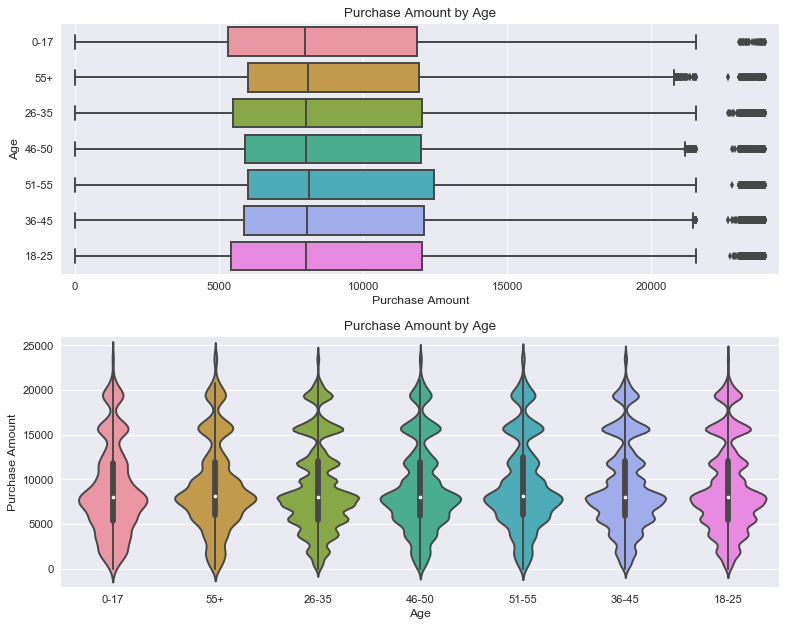

In [44]:
plt.gcf().clear()
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# Box and whiskers of purchase amount by age
plt.subplot(2,1,1)
sns.boxplot(x = 'Purchase_Amount', y = 'Age', data=trainDf)
plt.xlabel('Purchase Amount')
plt.ylabel('Age')
plt.title('Purchase Amount by Age')
plt.margins(.02)

# Violin plot of purchase amount by age
plt.subplot(2,1,2)
sns.violinplot(x='Age', y='Purchase_Amount', data=trainDf)
plt.title('Purchase Amount by Age')
plt.ylabel('Purchase Amount')
plt.margins(.02)

plt.tight_layout()
plt.show()

In [45]:
hold = trainDf.groupby('User_ID')['Purchase_Amount'].sum()
hold = hold.to_frame().reset_index().rename(columns={'Purchase_Amount': 'TotalPurchaseAmount'})
holdDf = trainDf
hold = pd.merge(hold, holdDf, on='User_ID', how='outer')
hold = hold.groupby(['User_ID', 'Age'])['TotalPurchaseAmount'].mean()
hold = hold.to_frame().reset_index().rename(columns={'Purchase_Amount': 'TotalPurchaseAmount'})

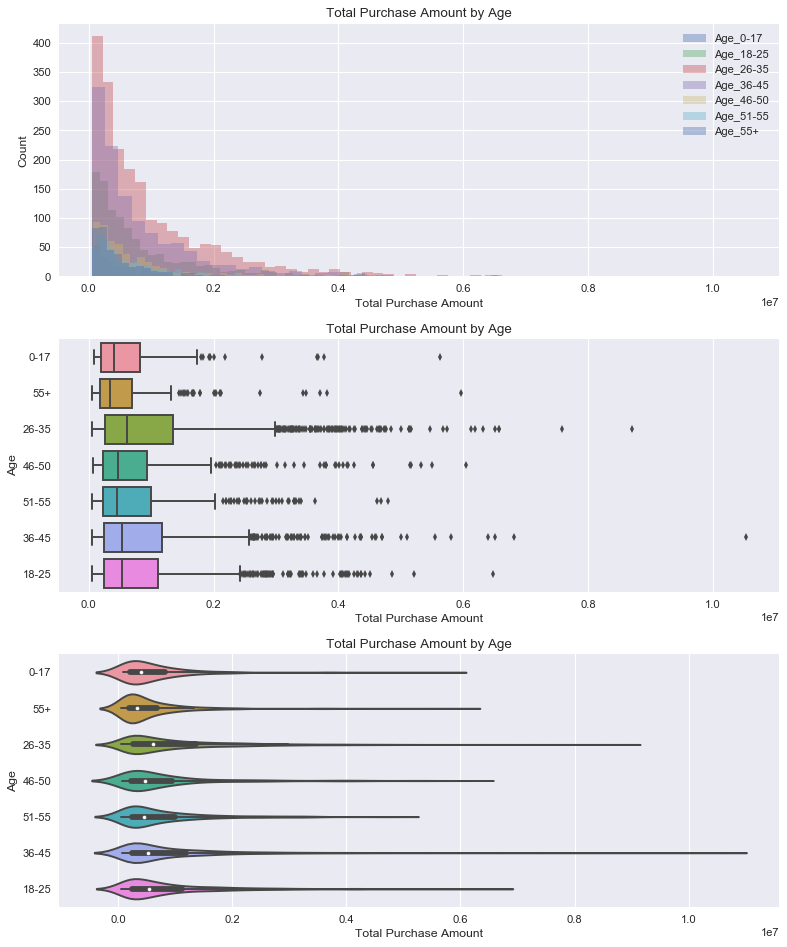

In [46]:
plt.gcf().clear()
fig=plt.figure(num=None, figsize=(10, 12), dpi=80, facecolor='w', edgecolor='k')

# Histogram of total purchase amount by age
plt.subplot(3,1,1)
hold.groupby('Age')['TotalPurchaseAmount'].hist(bins=50, alpha = .4)
plt.xlabel('Total Purchase Amount')
plt.ylabel('Count')
plt.legend(ages, loc = 'upper right')
plt.title('Total Purchase Amount by Age')

# Box and whiskers of purchase amount by age
plt.subplot(3,1,2)
sns.boxplot(x = 'TotalPurchaseAmount', y='Age', data= hold)
plt.xlabel('Total Purchase Amount')
plt.ylabel('Age')
plt.title('Total Purchase Amount by Age')

#Violin plot of purchase amount
plt.subplot(3,1,3)
sns.violinplot(x = 'TotalPurchaseAmount', y='Age', data= hold)
plt.title('Total Purchase Amount by Age')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

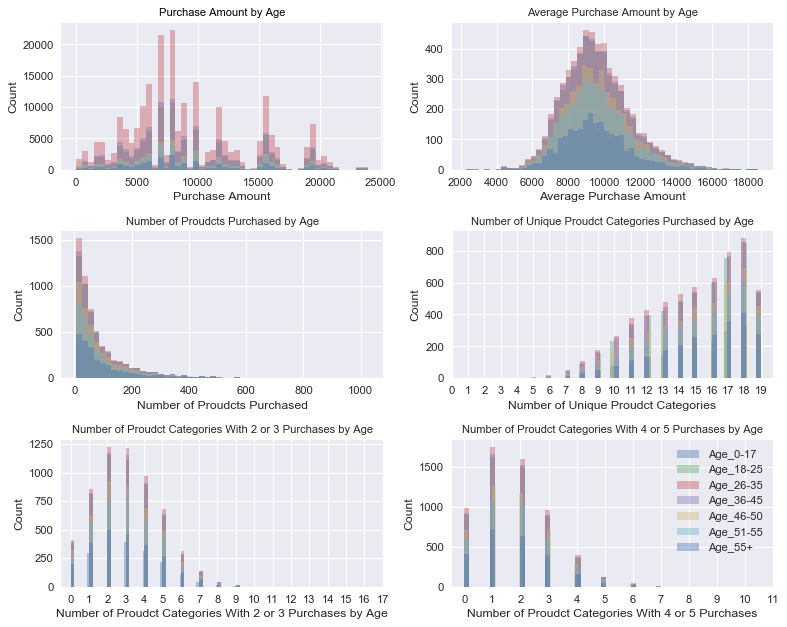

In [47]:
plt.gcf().clear()

alpha = .4
titles = trainDf.columns[14:21].tolist()
i = 0

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='white', edgecolor='k')

for key, value in ageDfs.items():
    
    #Purchase amount by age
    plt.subplot(3,2,1)
    value['Purchase_Amount'].hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Purchase Amount')
    plt.ylabel('Count')
    plt.title('Purchase Amount by Age',color='black', fontsize = 10)
    
    #Average purchase amount by age
    plt.subplot(3,2,2)
    value.groupby(by='User_ID')['AvgPurchaseAmount'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Average Purchase Amount')
    plt.ylabel('Count')
    plt.title('Average Purchase Amount by Age', fontsize = 10)
    
    #Total number of purchases by age
    plt.subplot(3,2,3)
    value.groupby(by='User_ID')['NumberPurchasesUser'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Proudcts Purchased')
    plt.ylabel('Count')
    plt.title('Number of Proudcts Purchased by Age', fontsize = 10)

    # Number of unique categories purchased by age
    plt.subplot(3,2,4)
    value.groupby(by='User_ID')['Unqiue_Cat_Count'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Unique Proudct Categories')
    x = range(0,20)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Unique Proudct Categories Purchased by Age', fontsize = 10)
    
    #Number of categories with two or more purchases age
    plt.subplot(3,2,5)
    value.groupby(by='User_ID')['2-3_Cat_Count'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Proudct Categories With 2 or 3 Purchases by Age')
    x = range(0,18)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Proudct Categories With 2 or 3 Purchases by Age', fontsize = 10)
    
    #Number of categories with five or more purchases age
    plt.subplot(3,2,6)
    value.groupby(by='User_ID')['4-5_Cat_Count'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Proudct Categories With 4 or 5 Purchases')
    x = range(0,12)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Proudct Categories With 4 or 5 Purchases by Age', fontsize = 10)
    plt.legend(loc = 'upper right')
    
    plt.tight_layout()
    i +=1

plt.show()

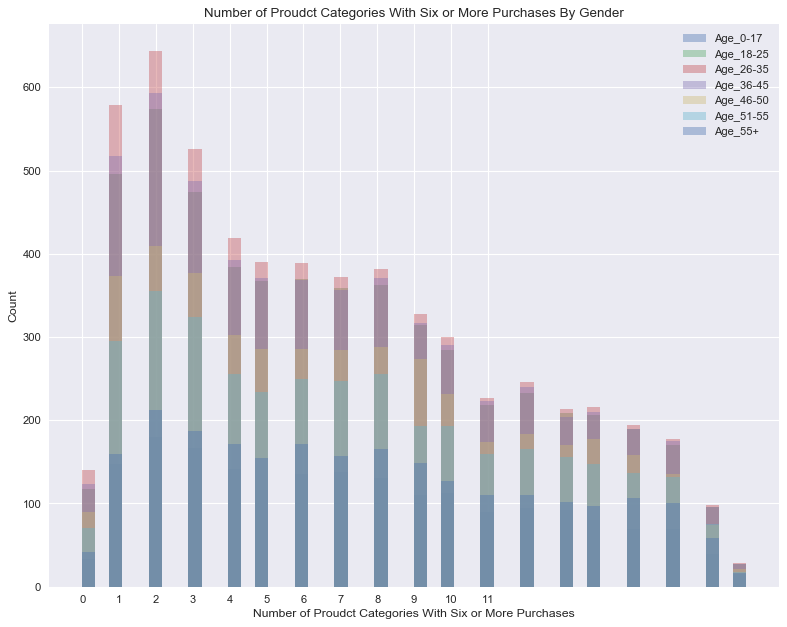

In [48]:
plt.gcf().clear()
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='white', edgecolor='k')

for key, value in ageDfs.items():

#Number of categories with 6 or more purchases
    value.groupby(by='User_ID')['6+_Cat_Count'].mean().hist(bins = 50, label = key, alpha=.4)
    plt.xlabel('Number of Proudct Categories With Six or More Purchases')
    x = range(0,12)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Proudct Categories With Six or More Purchases By Gender')
    plt.legend(loc = 'upper right')
    
    plt.tight_layout()
    i +=1

plt.show()

In [49]:
print('Starting analysis by occupation at: ',  datetime.datetime.now())

Starting analysis by occupation at:  2018-04-12 12:56:57.511351


In [50]:
occupations = trainDf.columns[21:42]

OccupationDfs = {}
Occupationslst = []

for item in occupations:
    OccupationDfs[item] = trainDf[trainDf[item]==1]
    Occupationslst.append(trainDf[trainDf[item]==1])

OccupationStats = {}

for key, value in OccupationDfs.items():
    
    temps = {}

    temps['AveragePurchaseAmount'] = np.mean(value['Purchase_Amount'])

    temps['TotalPurchaseAmount'] = value.Purchase_Amount.sum()

    temps['NumberPurchases'] = value.Purchase_Amount.count()

    temps['AverageNumberPurchases'] = np.mean(value.groupby(by='User_ID')['Purchase_Amount'].count())

    temps['AverageTotalPurchaseAmount'] = value.groupby(by='User_ID')['Purchase_Amount'].sum().mean()
    
    temps['MaxPurchaseAmountUsers'] = np.max(value['Purchase_Amount'])
    
    temps['MinPurchaseAmountUsers'] = np.min(value['Purchase_Amount'])
    
    temps['MaxNumberPurchasesUsers'] = np.max(value.groupby(by='User_ID')['Purchase_Amount'].count())
    
    temps['MinNumberPurchasesUsers'] = np.min(value.groupby(by='User_ID')['Purchase_Amount'].count())
    
    OccupationStats[key] = temps

i = 0

for key, value in OccupationStats.items():
    print('Statistics by ocupation: ', key, "\n")
    
    print(Occupationslst[i].Purchase_Amount.describe(), "\n")
    i += 1
    
    
    for k, v in value.items():
        print(k, ": ", v)
    print('\n')

Statistics by ocupation:  0_Occupation 

count    69638.000000
mean      9245.144677
std       5042.940017
min         12.000000
25%       5759.500000
50%       8043.000000
75%      12041.000000
max      23961.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  9245.144676756943
TotalPurchaseAmount :  643813385
NumberPurchases :  69638
AverageNumberPurchases :  13.855551134102667
AverageTotalPurchaseAmount :  128096.57481098289
MaxPurchaseAmountUsers :  23961
MinPurchaseAmountUsers :  12
MaxNumberPurchasesUsers :  207
MinNumberPurchasesUsers :  1


Statistics by ocupation:  1_Occupation 

count    47426.000000
mean      9117.337368
std       5091.170226
min         12.000000
25%       5441.000000
50%       8016.000000
75%      12012.000000
max      23960.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  9117.33736768861
TotalPurchaseAmount :  432398842
NumberPurchases :  47426
AverageNumberPurchases :  10.63601704418031
AverageTotalPurchaseAmou

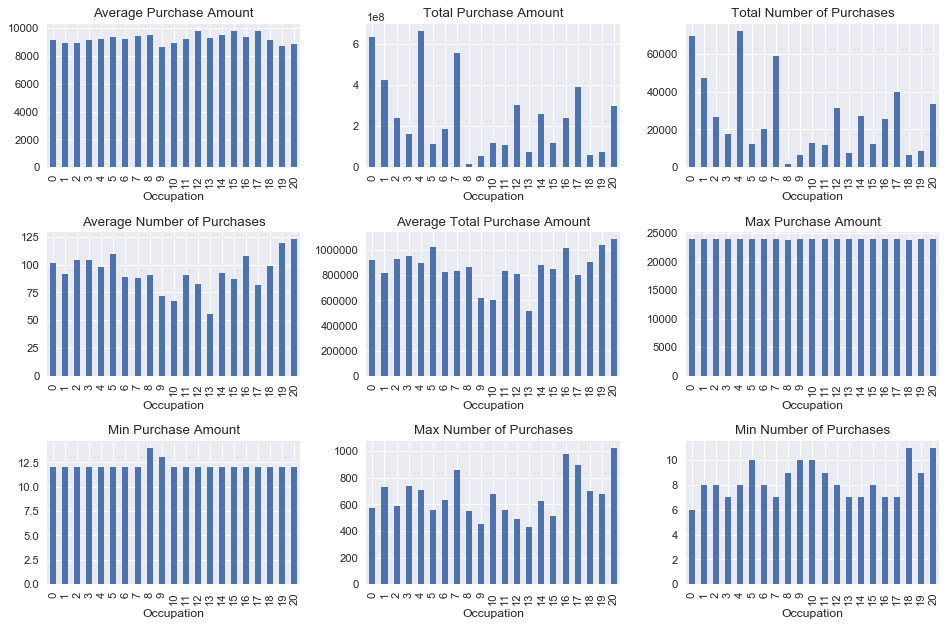

In [51]:
plt.gcf().clear()
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

#Plots Average Purchase Amount By occupation
plt.subplot(3,3,1)
df = trainDf.groupby(by='Occupation')['Purchase_Amount'].mean()
df.plot(kind='bar', title='Average Purchase Amount')

#Plots Total Purchase Amount By occupation
plt.subplot(3,3,2)
df = trainDf.groupby(by='Occupation')['Purchase_Amount'].sum()
df.plot(kind='bar', title = 'Total Purchase Amount')

#Plots Total Number of Purchases By occupation
plt.subplot(3,3,3)
df = trainDf.groupby(by=['Occupation'])['Purchase_Amount'].count()
df.plot(kind='bar', title = 'Total Number of Purchases')

#Plots Average Number of Purchases By occupation
plt.subplot(3,3,4)
tempDf = trainDf
df0 = trainDf.groupby(by='User_ID')['Purchase_Amount'].count().to_frame().reset_index()
df0.columns = ["User_ID", 'NumberPurchaseCount']
df1 = tempDf.merge(df0, on='User_ID')
df2 = df1.groupby(by = ["Occupation","User_ID"])['NumberPurchaseCount'].mean()
df3 = df2.groupby('Occupation').mean()
df3.plot(kind='bar', title ='Average Number of Purchases')

#Plots Average Total Purchase Amount By occupation
plt.subplot(3,3,5)
df = trainDf.groupby(by=['Occupation','User_ID'])['Purchase_Amount'].sum()
df2 = df.groupby(by='Occupation').mean()
df2.plot(kind='bar', title='Average Total Purchase Amount')

#Plots Maximumn Purchase Amount By occupation
plt.subplot(3,3,6)
df = trainDf.groupby('Occupation')['Purchase_Amount'].max()
df.plot(kind='bar', title='Max Purchase Amount')

#Plots Minimum Purchase Amount by occupation
plt.subplot(3,3,7)
df = trainDf.groupby('Occupation')['Purchase_Amount'].min()
df.plot(kind='bar', title='Min Purchase Amount')

#Plots Maximumn Number of Purchases By occupation
plt.subplot(3,3,8)
df = trainDf.groupby(by = ['Occupation','User_ID'])['Purchase_Amount'].count()
df1 = df.groupby('Occupation').max()
df1.plot(kind='bar', title='Max Number of Purchases')

#Plots Minimum Number of Purchases By occupation
plt.subplot(3,3,9)
df = trainDf.groupby(by = ['Occupation','User_ID'])['Purchase_Amount'].count()
df1 = df.groupby('Occupation').min()
df1.plot(kind='bar', title='Min Number of Purchases')

plt.tight_layout()
plt.show()

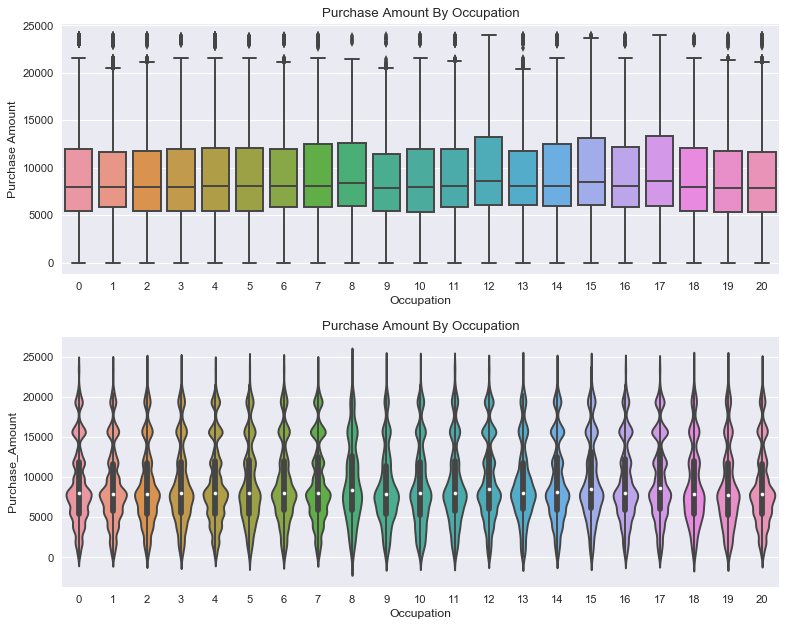

In [52]:
plt.gcf().clear()
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# Box and whiskers of purchase amount by occupation
plt.subplot(2,1,1)
sns.boxplot(x = 'Occupation', y = 'Purchase_Amount', data=trainDf)
plt.xlabel('Occupation')
plt.ylabel('Purchase Amount')
plt.title('Purchase Amount By Occupation')

# Violin of purchase amount by occupation
plt.subplot(2,1,2)
sns.violinplot(x='Occupation', y='Purchase_Amount', data=trainDf)
plt.title('Purchase Amount By Occupation')

plt.tight_layout()
plt.show()

In [53]:
# Uses random forest to determine importance of occupation to decide which to plot
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

cols = trainDf.iloc[:,70:85].columns
trainFIC = trainDf.drop(cols, axis=1)

y = trainFIC.Purchase_Amount
x = trainFIC.drop(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation','City_Category','Stay_In_Current_City_Years', 'Purchase_Amount'], axis=1)

rfr = RandomForestRegressor(n_jobs=-1, oob_score= True, random_state = 0, max_features=64)

rfr.fit(x,y)
 
importance = list(rfr.feature_importances_)
feature = list(x.columns)

feature_importance = pd.DataFrame({'Feature': feature, 'Importance': importance})

print('Feature importance determined from random forest')
print(feature_importance.sort_values('Importance', ascending=False))

Feature importance determined from random forest
                Feature  Importance
0    Product_Category_1    0.626243
62    AvgPurchaseAmount    0.030821
2    Product_Category_3    0.026690
67            _25th_per    0.025556
1    Product_Category_2    0.023152
68            _75th_per    0.019222
70               Median    0.018340
64         Max_Purchase    0.016466
66   Standard_Deviation    0.014618
63  NumberPurchasesUser    0.012626
65         Min_Purchase    0.012138
69                  IQR    0.011172
46   5_Product_Category    0.006938
49   8_Product_Category    0.006784
42   1_Product_Category    0.005587
55  14_Product_Category    0.005530
57  16_Product_Category    0.005261
56  15_Product_Category    0.004729
43   2_Product_Category    0.004530
8             Age_26-35    0.004258
38             Stay_1yr    0.004139
47   6_Product_Category    0.003896
35      City_Category_B    0.003819
13         0_Occupation    0.003784
34      City_Category_A    0.003704
52  11_Product_

/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [54]:
# Selects top six most important occupations and saves them as a list of integers
OccupationImportance = feature_importance[feature_importance.Feature.str.contains('Occupation')].sort_values(by = 'Importance', ascending=False)
Occupations6 = OccupationImportance.iloc[:6,:]

occ6 = []
oc6 = []

for string in Occupations6.Feature:
    #print(string)
    a, b = string.split('_')
    #print(a)
    #print(b)
    occ6.append(a)
    oc6.append(string)
    
occ6int = list(map(int, occ6))
occ6int

[0, 4, 7, 1, 17, 20]

In [55]:
OccupationImportance

,Feature,Importance
13,0_Occupation,0.003784
17,4_Occupation,0.003627
20,7_Occupation,0.003509
14,1_Occupation,0.002997
30,17_Occupation,0.002811
33,20_Occupation,0.002683
25,12_Occupation,0.002547
15,2_Occupation,0.002354
27,14_Occupation,0.002342
29,16_Occupation,0.002181


In [56]:
occ6int

[0, 4, 7, 1, 17, 20]

In [57]:
trainDf.Occupation = trainDf.Occupation.astype(str)

In [58]:
hold = trainDf.groupby('User_ID')['Purchase_Amount'].sum()
hold = hold.to_frame().reset_index().rename(columns={'Purchase_Amount': 'TotalPurchaseAmount'})
holdDf = trainDf
hold = pd.merge(hold, holdDf, on='User_ID', how='outer')
hold = hold.groupby(['User_ID', 'Occupation'])['TotalPurchaseAmount'].mean()
hold = hold.to_frame().reset_index().rename(columns={'Purchase_Amount': 'TotalPurchaseAmount'})

In [59]:
hold.Occupation = hold.Occupation.astype(int)

In [60]:
# Selects only top six occupations from hold which is holding stats aggregated by total purchase amount by occupation
hold = hold[hold.Occupation.isin(occ6int)]

In [61]:
# Extracts top six occupations for legend plotting 
occs = []
for string in occupations:
    a, b = string.split('_')
    c = int(a)
    if c in occ6int:
        occs.append(c)

In [62]:
occupations

Index(['0_Occupation', '1_Occupation', '2_Occupation', '3_Occupation',
       '4_Occupation', '5_Occupation', '6_Occupation', '7_Occupation',
       '8_Occupation', '9_Occupation', '10_Occupation', '11_Occupation',
       '12_Occupation', '13_Occupation', '14_Occupation', '15_Occupation',
       '16_Occupation', '17_Occupation', '18_Occupation', '19_Occupation',
       '20_Occupation'],
      dtype='object')

In [63]:
occs

[0, 1, 4, 7, 17, 20]

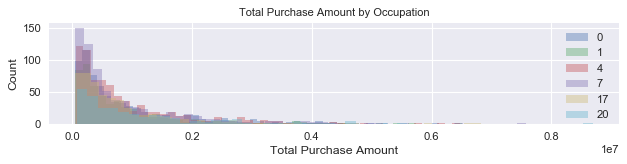

In [64]:
plt.gcf().clear()
plt.figure(num=None, dpi=80, facecolor='w', edgecolor='k')

#Total Purchase amount plotted
plt.subplot(3,1,1)
hold.groupby('Occupation')['TotalPurchaseAmount'].hist(bins=50, alpha = .4)
plt.xlabel('Total Purchase Amount')
plt.ylabel('Count')
plt.legend(occs, loc = 'upper right')
plt.title('Total Purchase Amount by Occupation', fontsize = 10)

plt.tight_layout()
plt.show()

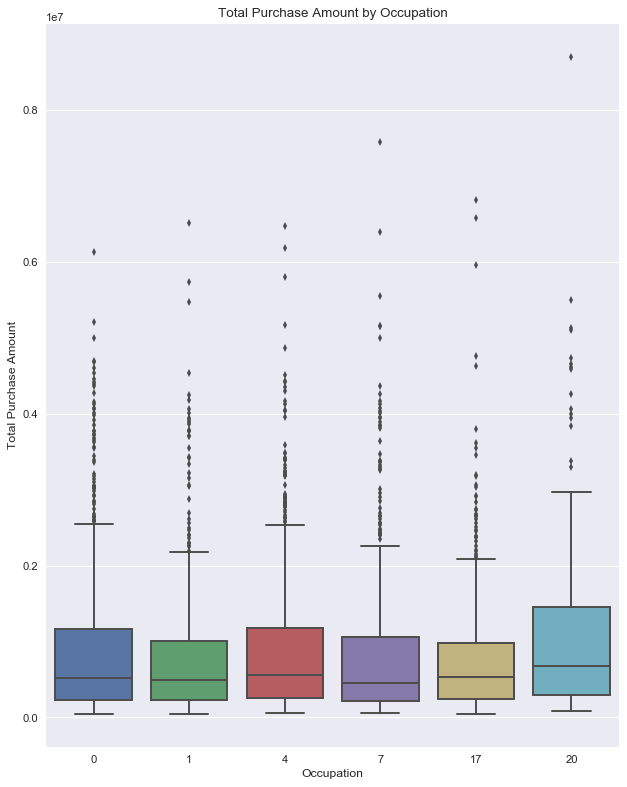

In [65]:
plt.gcf().clear()
plt.figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')

# Box and whiskers of total purchase amount by occupation
sns.boxplot(y = 'TotalPurchaseAmount', x='Occupation', data= hold)
plt.ylabel('Total Purchase Amount')
plt.xlabel('Occupation')
plt.title('Total Purchase Amount by Occupation')

plt.tight_layout()
plt.show()

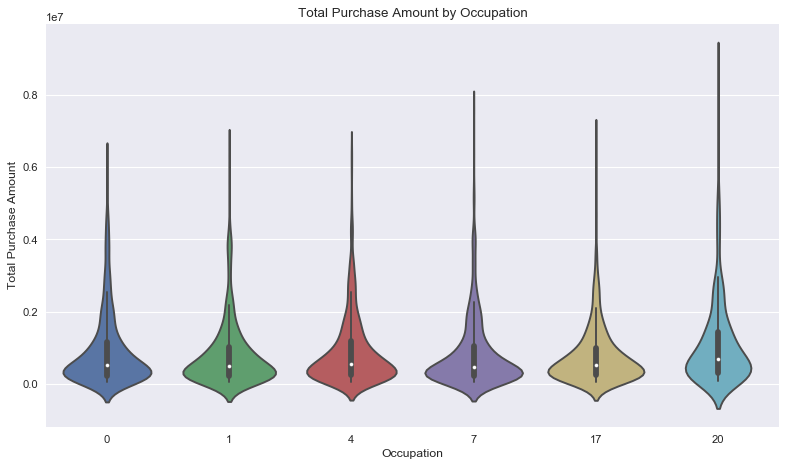

In [66]:
plt.gcf().clear()
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

#Violin plot of purchase amount by occupation
sns.violinplot(y = 'TotalPurchaseAmount', x='Occupation', data= hold)
plt.title('Total Purchase Amount by Occupation')
plt.ylabel('Total Purchase Amount')

plt.tight_layout()
plt.show()

In [67]:
# Removes non-top-six occuaptions from OccupationDfs
l = list(OccupationDfs.keys())
for occ in l:
    if occ not in oc6:
        OccupationDfs.pop(occ, None)
        
print(OccupationDfs.keys())

dict_keys(['0_Occupation', '1_Occupation', '4_Occupation', '7_Occupation', '17_Occupation', '20_Occupation'])


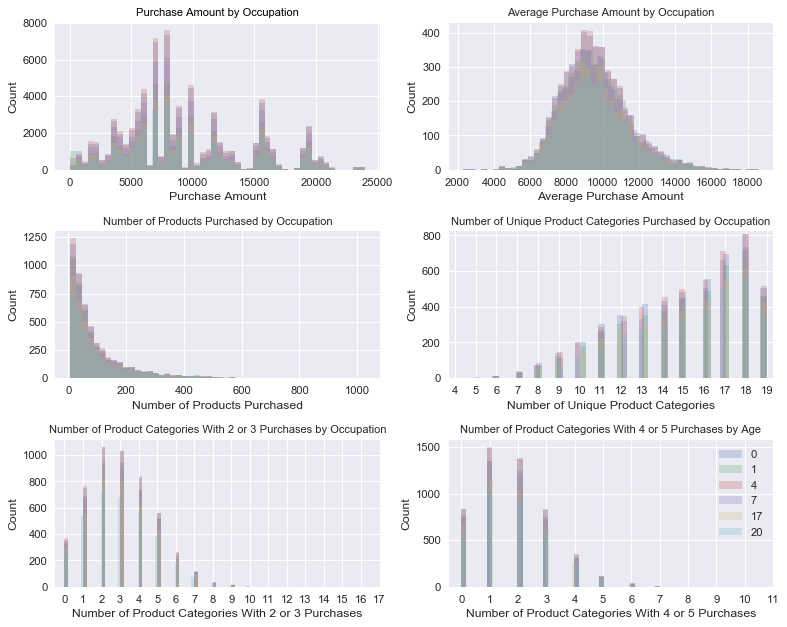

In [68]:
plt.gcf().clear()

alpha = .25
titles = trainDf.columns[14:21].tolist()
i = 0

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='white', edgecolor='k')

for key, value in OccupationDfs.items():
    
    #Purchase amount by occupation
    plt.subplot(3,2,1)
    value['Purchase_Amount'].hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Purchase Amount')
    plt.ylabel('Count')
    plt.title('Purchase Amount by Occupation',color='black', fontsize = 10)
    
    #Average purchase amount by occupation
    plt.subplot(3,2,2)
    value.groupby(by='User_ID')['AvgPurchaseAmount'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Average Purchase Amount')
    plt.ylabel('Count')
    plt.title('Average Purchase Amount by Occupation', fontsize = 10)
    
    #Total number of purchases by occupation
    plt.subplot(3,2,3)
    value.groupby(by='User_ID')['NumberPurchasesUser'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Products Purchased')
    plt.ylabel('Count')
    plt.title('Number of Products Purchased by Occupation', fontsize = 10)
    
    # Number of unique categories purchased by occupation
    plt.subplot(3,2,4)
    value.groupby(by='User_ID')['Unqiue_Cat_Count'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Unique Product Categories')
    x = range(0,20)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Unique Product Categories Purchased by Occupation', fontsize = 10)
    #plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Number of categories with two or three purchases by occupation
    plt.subplot(3,2,5)
    value.groupby(by='User_ID')['2-3_Cat_Count'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Product Categories With 2 or 3 Purchases')
    x = range(0,18)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Product Categories With 2 or 3 Purchases by Occupation', fontsize = 10)
    
    #Number of categories with four or five purchases by occupation
    plt.subplot(3,2,6)
    value.groupby(by='User_ID')['4-5_Cat_Count'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Product Categories With 4 or 5 Purchases')
    x = range(0,12)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Product Categories With 4 or 5 Purchases by Age', fontsize = 10)
    plt.legend(occs, loc = 'upper right')
    
    plt.tight_layout()
    i +=1

plt.show()

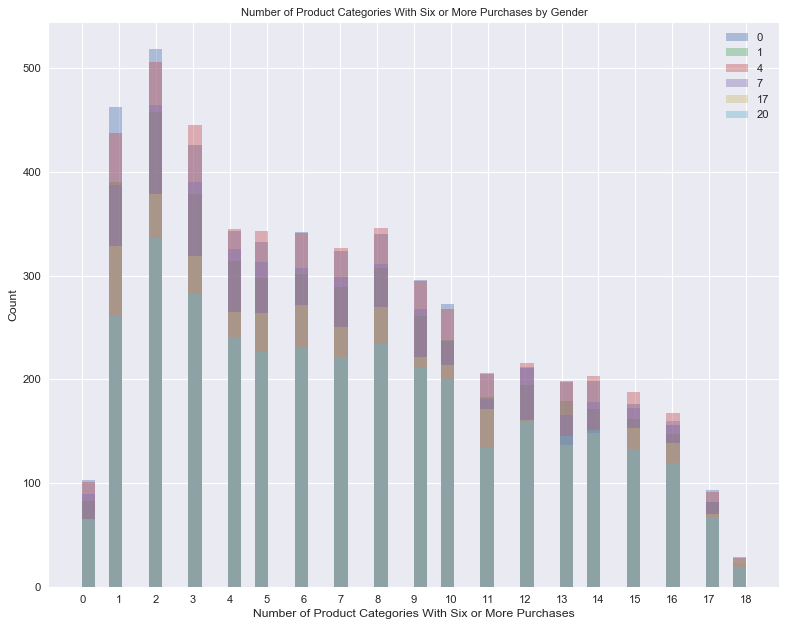

In [69]:
plt.gcf().clear()
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='white', edgecolor='k')


for key, value in OccupationDfs.items():

#Number of categories with 6 or more purchases
    value.groupby(by='User_ID')['6+_Cat_Count'].mean().hist(bins = 50, label = key, alpha=.4)
    plt.xlabel('Number of Product Categories With Six or More Purchases')
    x = range(0,19)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Product Categories With Six or More Purchases by Gender', fontsize = 10)
    plt.legend(occs, loc = 'upper right')
    
    plt.tight_layout()
    i +=1

plt.show()

In [70]:
print('Starting analaysis by city at: ', datetime.datetime.now())

Starting analaysis by city at:  2018-04-12 12:58:02.340337


In [71]:
citycat = trainDf.columns[42:45]

citycatDfs = {}
citycatLst = []

for item in citycat:
    citycatDfs[item] = trainDf[trainDf[item]==1]
    citycatLst.append(trainDf[trainDf[item]==1])
    
citycatStats = {}
citycatStat = {}


for key, value in citycatDfs.items():

    temps = {}
    temp = {}


    temps['AveragePurchaseAmount'] = np.mean(value['Purchase_Amount'])

    temps['TotalPurchaseAmount'] = value.Purchase_Amount.sum()

    temps['NumberPurchases'] = value.Purchase_Amount.count()

    temps['AverageNumberPurchases'] = np.mean(value.groupby(by='User_ID')['Purchase_Amount'].count())

    temps['AverageTotalPurchaseAmount'] = value.groupby(by='User_ID')['Purchase_Amount'].sum().mean()

    temps['MaxPurchaseAmountUsers'] = np.max(value['Purchase_Amount'])
    
    temps['MinPurchaseAmountUsers'] = np.min(value['Purchase_Amount'])
    
    temps['MaxNumberPurchasesUsers'] = np.max(value.groupby(by='User_ID')['Purchase_Amount'].count())
    
    temps['MinNumberPurchasesUsers'] = np.min(value.groupby(by='User_ID')['Purchase_Amount'].count())
    
    temp['AveragePurchaseAmountUser'] = value.groupby(by='User_ID')['Purchase_Amount'].mean()
    
    temp['NumberOfPurchasesUser'] = value.groupby(by='User_ID')['Purchase_Amount'].count().sort_values(ascending=False)
    
    citycatStats[key] = temps
    citycatStat[key] = temp

    
i = 0

for key, value in citycatStats.items():
    print('Statistics by city: ', key, "\n")
    
    print(citycatLst[i].Purchase_Amount.describe(), "\n")
    i += 1
    
    for k, v in value.items():
        print(k, ": ", v)
    print('\n')
    

Statistics by city:  City_Category_A 

count    147720.000000
mean       9301.463830
std        4999.148258
min          12.000000
25%        5848.000000
50%        8053.000000
75%       12062.000000
max       23961.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  9301.463830219334
TotalPurchaseAmount :  1374012237
NumberPurchases :  147720
AverageNumberPurchases :  25.482145937553906
AverageTotalPurchaseAmount :  237021.25875452821
MaxPurchaseAmountUsers :  23961
MinPurchaseAmountUsers :  12
MaxNumberPurchasesUsers :  396
MinNumberPurchasesUsers :  1


Statistics by city:  City_Category_B 

count    231173.000000
mean       9270.355232
std        5037.678744
min          12.000000
25%        5822.000000
50%        8049.000000
75%       12060.000000
max       23961.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  9270.3552317961
TotalPurchaseAmount :  2143055830
NumberPurchases :  231173
AverageNumberPurchases :  39.308450943717055
AverageT

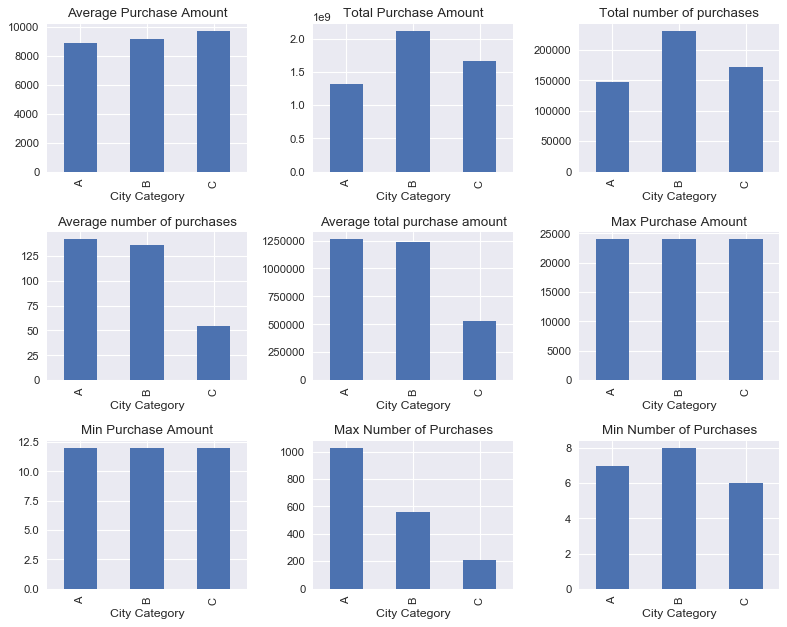

In [72]:
plt.gcf().clear()
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

#Plots Average Purchase Amount By city category
plt.subplot(3,3,1)
df = trainDf.groupby(by='City_Category')['Purchase_Amount'].mean()
df.plot(kind='bar', title='Average Purchase Amount')
plt.xlabel('City Category')

#Plots Total Purchase Amount By city category
plt.subplot(3,3,2)
df = trainDf.groupby(by='City_Category')['Purchase_Amount'].sum()
df.plot(kind='bar', title = 'Total Purchase Amount')
plt.xlabel('City Category')

#Plots Total Number of Purchases By city category
plt.subplot(3,3,3)
df = trainDf.groupby(by=['City_Category'])['Purchase_Amount'].count()
df.plot(kind='bar', title = 'Total number of purchases')
plt.xlabel('City Category')

#Plots Average Number of Purchases By city category
plt.subplot(3,3,4)
tempDf = trainDf
df0 = trainDf.groupby(by='User_ID')['Purchase_Amount'].count().to_frame().reset_index()
df0.columns = ["User_ID", 'NumberPurchaseCount']
df1 = tempDf.merge(df0, on='User_ID')
df2 = df1.groupby(by = ["City_Category","User_ID"])['NumberPurchaseCount'].mean()
df3 = df2.groupby('City_Category').mean()
df3.plot(kind='bar', title ='Average number of purchases')
plt.xlabel('City Category')

#Plots Average Total Purchase Amount By city category
plt.subplot(3,3,5)
df = trainDf.groupby(by=['City_Category','User_ID'])['Purchase_Amount'].sum()
df2 = df.groupby(by='City_Category').mean()
df2.plot(kind='bar', title='Average total purchase amount')
plt.xlabel('City Category')

#Plots Maximumn Purchase Amount By city category
plt.subplot(3,3,6)
df = trainDf.groupby('City_Category')['Purchase_Amount'].max()
df.plot(kind='bar', title='Max Purchase Amount')
plt.xlabel('City Category')

#Plots Minimum Purchase Amount by city category
plt.subplot(3,3,7)
df = trainDf.groupby('City_Category')['Purchase_Amount'].min()
df.plot(kind='bar', title='Min Purchase Amount')
plt.xlabel('City Category')

#Plots Maximumn Number of Purchases By city category
plt.subplot(3,3,8)
df = trainDf.groupby(by = ['City_Category','User_ID'])['Purchase_Amount'].count()
df1 = df.groupby('City_Category').max()
df1.plot(kind='bar', title='Max Number of Purchases')
plt.xlabel('City Category')

#Plots Minimum Number of Purchases By city category
plt.subplot(3,3,9)
df = trainDf.groupby(by = ['City_Category','User_ID'])['Purchase_Amount'].count()
df1 = df.groupby('City_Category').min()
df1.plot(kind='bar', title='Min Number of Purchases')
plt.xlabel('City Category')

plt.tight_layout()
plt.show()

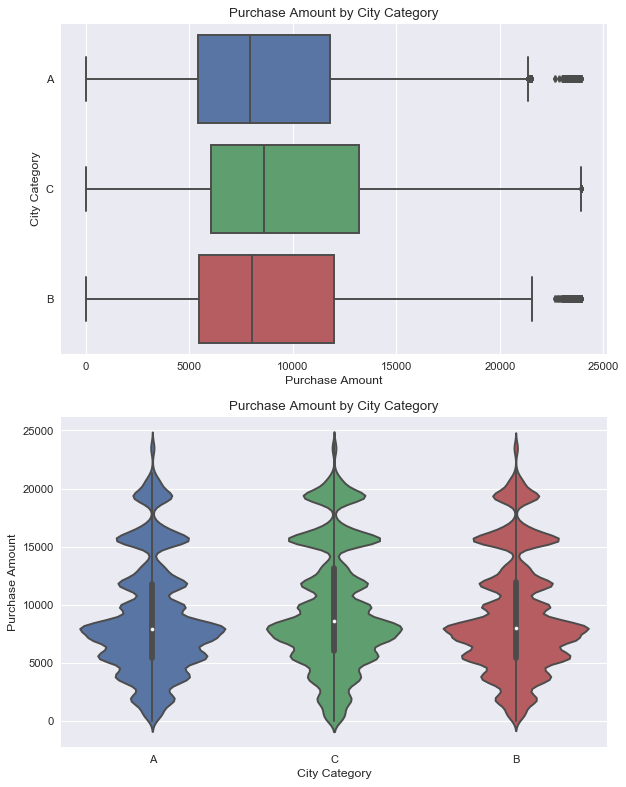

In [73]:
plt.gcf().clear()
plt.figure(num=None, figsize=(8,10), dpi=80, facecolor='w', edgecolor='k')

#Box and whiskers of purchase amount by city category
plt.subplot(2,1,1)
sns.boxplot(x = 'Purchase_Amount', y='City_Category', data=trainDf)
plt.xlabel('Purchase Amount')
plt.ylabel('City Category')
plt.title('Purchase Amount by City Category')

#Violinplot of purchase amount by city category
plt.subplot(2,1,2)
sns.violinplot( y='Purchase_Amount', x='City_Category', data=trainDf)
plt.title('Purchase Amount by City Category')
plt.ylabel('Purchase Amount')
plt.xlabel('City Category')

plt.tight_layout()
plt.show()

In [74]:
hold = trainDf.groupby('User_ID')['Purchase_Amount'].sum()
hold = hold.to_frame().reset_index().rename(columns={'Purchase_Amount': 'TotalPurchaseAmount'})
holdDf = trainDf
hold = pd.merge(hold, holdDf, on='User_ID', how='outer')
hold = hold.groupby(['User_ID', 'City_Category'])['TotalPurchaseAmount'].mean()
hold = hold.to_frame().reset_index().rename(columns={'Purchase_Amount': 'TotalPurchaseAmount'})

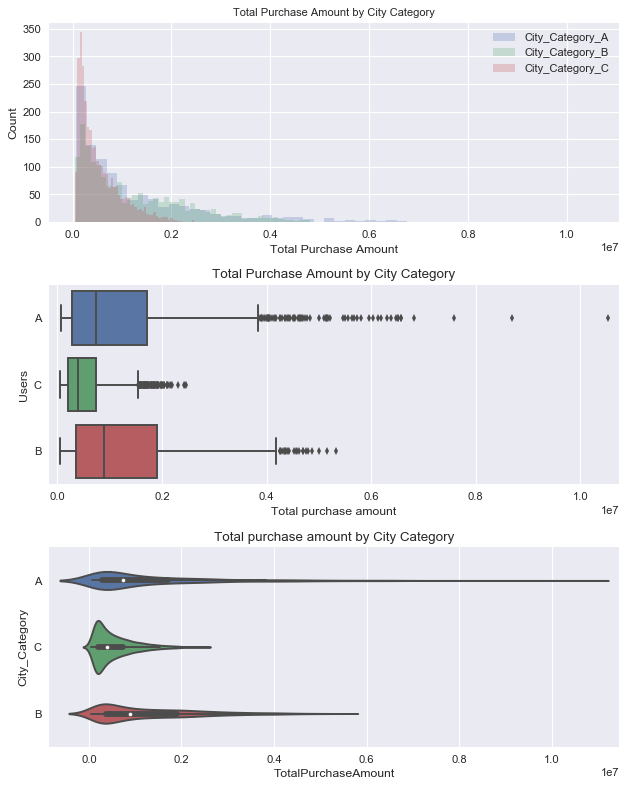

In [75]:
plt.gcf().clear()
plt.figure(num=None, figsize=(8,10), dpi=80, facecolor='w', edgecolor='k')

#Total Purchase amount plotted
plt.subplot(3,1,1)
hold.groupby('City_Category')['TotalPurchaseAmount'].hist(bins=50, alpha = .25)
plt.xlabel('Total Purchase Amount')
plt.ylabel('Count')
plt.legend(citycat, loc = 'upper right')
plt.title('Total Purchase Amount by City Category', fontsize = 10)

#Box and whiskers of purchase amount
plt.subplot(3,1, 2)
sns.boxplot(x = 'TotalPurchaseAmount', y='City_Category', data= hold)
plt.xlabel('Total purchase amount')
plt.ylabel('Users')
plt.title('Total Purchase Amount by City Category')
plt.margins(.02)

#Violin plot of purchase amount
plt.subplot(3,1,3)
sns.violinplot(x = 'TotalPurchaseAmount',  y='City_Category', data= hold)
plt.title('Total purchase amount by City Category')
plt.margins(.02)

plt.tight_layout()
plt.show()

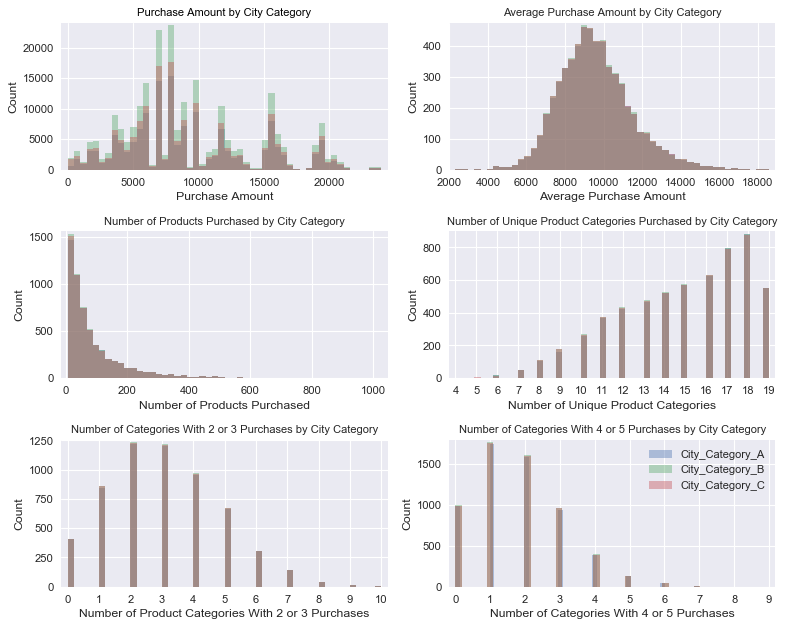

In [76]:
plt.gcf().clear()

alpha = .4
titles = trainDf.columns[14:21].tolist()
i = 0

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='white', edgecolor='k')

for key, value in citycatDfs.items():
    
    #Purchase amount by city category
    plt.subplot(3,2,1)
    value['Purchase_Amount'].hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Purchase Amount')
    plt.ylabel('Count')
    plt.title('Purchase Amount by City Category',color='black', fontsize = 10)
    #plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Average purchase amount by city category
    plt.subplot(3,2,2)
    value.groupby(by='User_ID')['AvgPurchaseAmount'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Average Purchase Amount')
    plt.ylabel('Count')
    plt.title('Average Purchase Amount by City Category', fontsize = 10)
    #plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Total number of purchases by city category
    plt.subplot(3,2,3)
    value.groupby(by='User_ID')['NumberPurchasesUser'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Products Purchased')
    plt.ylabel('Count')
    plt.title('Number of Products Purchased by City Category', fontsize = 10)
    #plt.legend(loc = 'upper right')
    plt.margins(.02)

    # Number of unique categories purchased by city category
    plt.subplot(3,2,4)
    value.groupby(by='User_ID')['Unqiue_Cat_Count'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Unique Product Categories')
    x = range(0,20)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Unique Product Categories Purchased by City Category', fontsize = 10)
    #plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Number of categories with two or more purchases by city category
    plt.subplot(3,2,5)
    value.groupby(by='User_ID')['2-3_Cat_Count'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Product Categories With 2 or 3 Purchases')
    x = range(0,18)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Categories With 2 or 3 Purchases by City Category', fontsize = 10)
    #plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Number of categories with five or more purchases by city category
    plt.subplot(3,2,6)
    value.groupby(by='User_ID')['4-5_Cat_Count'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Categories With 4 or 5 Purchases')
    x = range(0,12)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Categories With 4 or 5 Purchases by City Category', fontsize = 10)
    plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    plt.tight_layout()
    i +=1

plt.show()

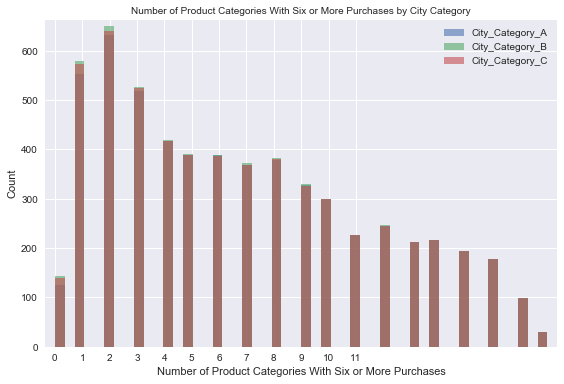

In [77]:
plt.gcf().clear()

for key, value in citycatDfs.items():

#Number of categories with 6 or more purchases by city category
    value.groupby(by='User_ID')['6+_Cat_Count'].mean().hist(bins = 50, label = key, alpha=.6)
    plt.xlabel('Number of Product Categories With Six or More Purchases')
    x = range(0,12)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Product Categories With Six or More Purchases by City Category', fontsize = 10)
    plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    plt.tight_layout()
    i +=1

plt.show()

In [78]:
print('Starting analysis by years stayed in city at: ', datetime.datetime.now())

Starting analysis by years stayed in city at:  2018-04-12 12:58:26.208787


In [79]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 94 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null object
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null int64
Product_Category_3            550068 non-null int64
Purchase_Amount               550068 non-null int64
Marital_Status                550068 non-null int64
Female                        550068 non-null float64
Male                          550068 non-null float64
Age_0-17                      550068 non-null float64
Age_18-25                     550068 non-null float64
Age_26-35                     550068 non-nu

In [80]:
trainDf.groupby('Stay_In_Current_City_Years')['User_ID'].nunique()

Stay_In_Current_City_Years
0      772
1     2086
2     1145
3      979
4+     909
Name: User_ID, dtype: int64

In [81]:
staycurrcity = trainDf.columns[45:50]

staycurrcityDfs = {}
staycurrcityLst = []

for item in staycurrcity:
    staycurrcityDfs[item] = trainDf[trainDf[item]==1]
    staycurrcityLst.append(trainDf[trainDf[item]==1])
    
staycurrcityStats = {}
staycurrcityStat = {}


for key, value in staycurrcityDfs.items():
    
    temps = {}
    temp = {}


    temps['AveragePurchaseAmount'] = np.mean(value['Purchase_Amount'])

    temps['TotalPurchaseAmount'] = value.Purchase_Amount.sum()

    temps['NumberPurchases'] = value.Purchase_Amount.count()

    temps['AverageNumberPurchases'] = np.mean(value.groupby(by='User_ID')['Purchase_Amount'].count())

    temps['AverageTotalPurchaseAmount'] = value.groupby(by='User_ID')['Purchase_Amount'].sum().mean()

    temps['MaxPurchaseAmountUsers'] = np.max(value['Purchase_Amount'])
    
    temps['MinPurchaseAmountUsers'] = np.min(value['Purchase_Amount'])
    
    temps['MaxNumberPurchasesUsers'] = np.max(value.groupby(by='User_ID')['Purchase_Amount'].count())
    
    temps['MinNumberPurchasesUsers'] = np.min(value.groupby(by='User_ID')['Purchase_Amount'].count())
    
    temp['AveragePurchaseAmountUser'] = value.groupby(by='User_ID')['Purchase_Amount'].mean()
    
    temp['NumberOfPurchasesUser'] = value.groupby(by='User_ID')['Purchase_Amount'].count().sort_values(ascending=False)
    
    staycurrcityStats[key] = temps
    staycurrcityStat[key] = temp

    
i = 0

for key, value in staycurrcityStats.items():
    print('Statistics by years in current city of: ', key, "\n")
    
    print(staycurrcityLst[i].Purchase_Amount.describe(), "\n")
    i += 1
    
    
    for k, v in value.items():
        print(k, ": ", v)
    print('\n')
    

    

Statistics by years in current city of:  Stay_0yr 

count    74398.000000
mean      9300.916879
std       5003.903467
min         12.000000
25%       5852.000000
50%       8050.500000
75%      12054.750000
max      23961.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  9300.916879486007
TotalPurchaseAmount :  691969614
NumberPurchases :  74398
AverageNumberPurchases :  14.999596774193549
AverageTotalPurchaseAmount :  139510.00282258063
MaxPurchaseAmountUsers :  23961
MinPurchaseAmountUsers :  12
MaxNumberPurchasesUsers :  260
MinNumberPurchasesUsers :  1


Statistics by years in current city of:  Stay_1yr 

count    193821.000000
mean       9285.832531
std        5029.832409
min          12.000000
25%        5833.000000
50%        8055.000000
75%       12067.000000
max       23960.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  9285.832531046688
TotalPurchaseAmount :  1799789347
NumberPurchases :  193821
AverageNumberPurchases :  33.080901

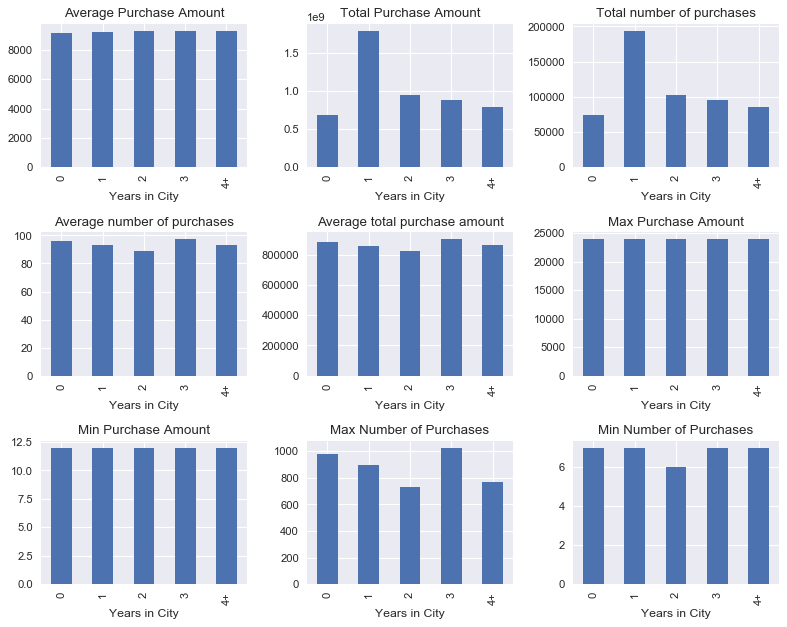

In [82]:
plt.gcf().clear()
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

#Plots Average Purchase Amount by years stayed in current city
plt.subplot(3,3,1)
df = trainDf.groupby(by='Stay_In_Current_City_Years')['Purchase_Amount'].mean()
df.plot(kind='bar', title='Average Purchase Amount')
plt.xlabel('Years in City')

#Plots Total Purchase Amount by years stayed in current city
plt.subplot(3,3,2)
df = trainDf.groupby(by='Stay_In_Current_City_Years')['Purchase_Amount'].sum()
df.plot(kind='bar', title = 'Total Purchase Amount')
plt.xlabel('Years in City')

#Plots Total Number of Purchases by years stayed in current city
plt.subplot(3,3,3)
df = trainDf.groupby(by=['Stay_In_Current_City_Years'])['Purchase_Amount'].count()
df.plot(kind='bar', title = 'Total number of purchases')
plt.xlabel('Years in City')

#Plots Average Number of Purchases by years stayed in current city
plt.subplot(3,3,4)
tempDf = trainDf
df0 = trainDf.groupby(by='User_ID')['Purchase_Amount'].count().to_frame().reset_index()
df0.columns = ["User_ID", 'NumberPurchaseCount']
df1 = tempDf.merge(df0, on='User_ID')
df2 = df1.groupby(by = ["Stay_In_Current_City_Years","User_ID"])['NumberPurchaseCount'].mean()
df3 = df2.groupby('Stay_In_Current_City_Years').mean()
df3.plot(kind='bar', title ='Average number of purchases')
plt.xlabel('Years in City')

#Plots Average Total Purchase Amount by years stayed in current city
plt.subplot(3,3,5)
df = trainDf.groupby(by=['Stay_In_Current_City_Years','User_ID'])['Purchase_Amount'].sum()
df2 = df.groupby(by='Stay_In_Current_City_Years').mean()
df2.plot(kind='bar', title='Average total purchase amount')
plt.xlabel('Years in City')

#Plots Maximumn Purchase Amount by years stayed in current city
plt.subplot(3,3,6)
df = trainDf.groupby('Stay_In_Current_City_Years')['Purchase_Amount'].max()
df.plot(kind='bar', title='Max Purchase Amount')
plt.xlabel('Years in City')

#Plots Minimum Purchase Amount by years stayed in current city
plt.subplot(3,3,7)
df = trainDf.groupby('Stay_In_Current_City_Years')['Purchase_Amount'].min()
df.plot(kind='bar', title='Min Purchase Amount')
plt.xlabel('Years in City')

#Plots Maximumn Number of Purchases by years stayed in current city
plt.subplot(3,3,8)
df = trainDf.groupby(by = ['Stay_In_Current_City_Years','User_ID'])['Purchase_Amount'].count()
df1 = df.groupby('Stay_In_Current_City_Years').max()
df1.plot(kind='bar', title='Max Number of Purchases')
plt.xlabel('Years in City')

#Plots Minimum Number of Purchases by years stayed in current city
plt.subplot(3,3,9)
df = trainDf.groupby(by = ['Stay_In_Current_City_Years','User_ID'])['Purchase_Amount'].count()
df1 = df.groupby('Stay_In_Current_City_Years').min()
df1.plot(kind='bar', title='Min Number of Purchases')
plt.xlabel('Years in City')

plt.tight_layout()
plt.show()

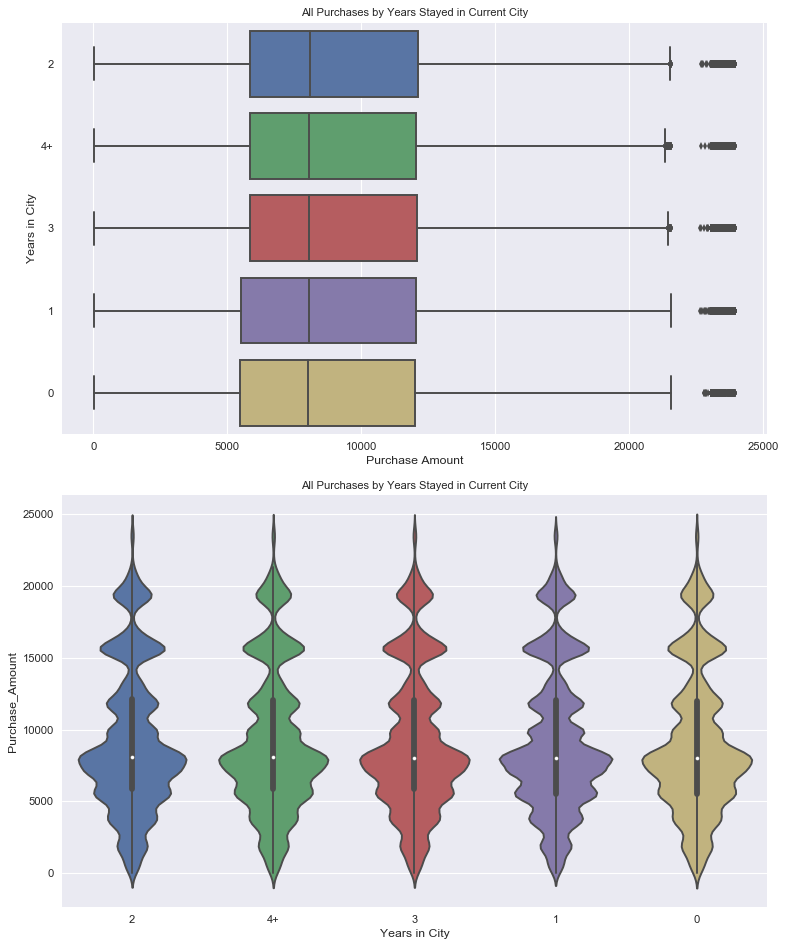

In [83]:
plt.gcf().clear()
plt.figure(num=None, figsize=(10, 12), dpi=80, facecolor='w', edgecolor='k')

#Box and whiskers of purchase amount by years in current city
plt.subplot(2,1,1)
sns.boxplot(x = 'Purchase_Amount', y='Stay_In_Current_City_Years', data=trainDf)
plt.xlabel('Purchase Amount')
plt.ylabel('Years in City')
plt.title('All Purchases by Years Stayed in Current City', fontsize = 10)

#Violinplot of purchase amount by years in current city
plt.subplot(2,1,2)
sns.violinplot( y='Purchase_Amount', x='Stay_In_Current_City_Years', data=trainDf)
plt.title('All Purchases by Years Stayed in Current City', fontsize = 10)
plt.xlabel('Years in City')

plt.tight_layout()
plt.show()

In [84]:
hold = trainDf.groupby('User_ID')['Purchase_Amount'].sum()
hold = hold.to_frame().reset_index().rename(columns={'Purchase_Amount': 'TotalPurchaseAmount'})
holdDf = trainDf
hold = pd.merge(hold, holdDf, on='User_ID', how='outer')
hold = hold.groupby(['User_ID', 'Stay_In_Current_City_Years'])['TotalPurchaseAmount'].mean()
hold = hold.to_frame().reset_index().rename(columns={'Purchase_Amount': 'TotalPurchaseAmount'})

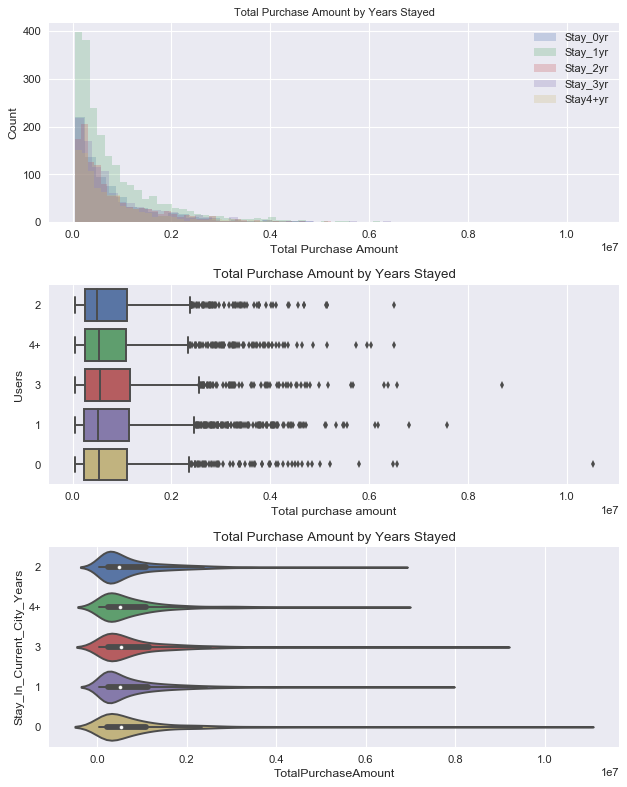

In [85]:
plt.gcf().clear()
plt.figure(num=None, dpi=80, figsize=(8,10), facecolor='w', edgecolor='k')

#Total Purchase amount plotted by years in current city
plt.subplot(3,1,1)
hold.groupby('Stay_In_Current_City_Years')['TotalPurchaseAmount'].hist(bins=50, alpha = .25)
plt.xlabel('Total Purchase Amount')
plt.ylabel('Count')
plt.legend(staycurrcity, loc = 'upper right')
plt.title('Total Purchase Amount by Years Stayed', fontsize = 10)

#Box and whiskers of purchase amount by years in current city
plt.subplot(3,1,2)
sns.boxplot(x = 'TotalPurchaseAmount', y='Stay_In_Current_City_Years', data= hold)
plt.xlabel('Total purchase amount')
plt.ylabel('Users')
plt.title('Total Purchase Amount by Years Stayed')

#Violin plot of purchase amount by years in current city
plt.subplot(3,1,3)
sns.violinplot(x = 'TotalPurchaseAmount',  y='Stay_In_Current_City_Years', data= hold)
plt.title('Total Purchase Amount by Years Stayed')

plt.tight_layout()
plt.show()

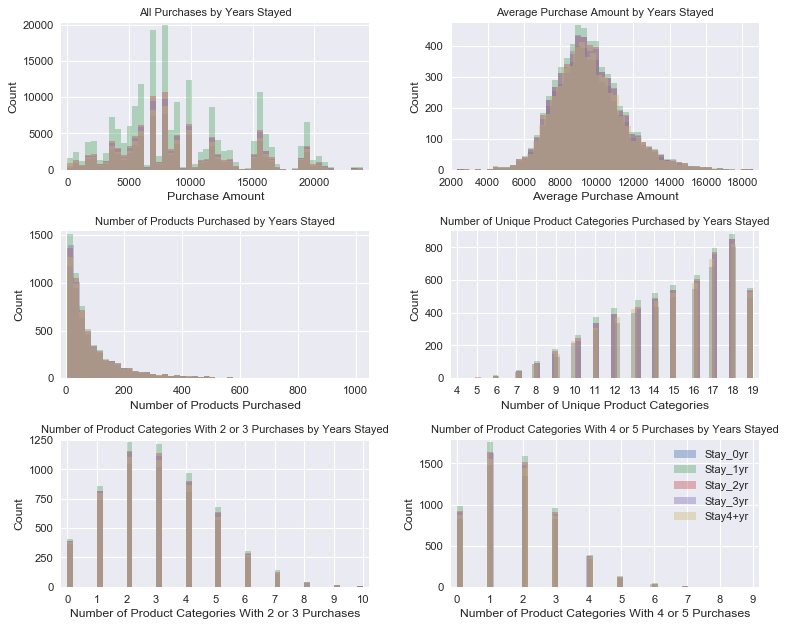

In [86]:
plt.gcf().clear()

alpha = .4
titles = trainDf.columns[14:21].tolist()
i = 0

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='white', edgecolor='k')

for key, value in staycurrcityDfs.items():
    
    #Purchase amount by years in current city
    plt.subplot(3,2,1)
    value['Purchase_Amount'].hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Purchase Amount')
    plt.ylabel('Count')
    plt.title('All Purchases by Years Stayed', fontsize = 10)
    #plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Average purchase amount by years in current city
    plt.subplot(3,2,2)
    value.groupby(by='User_ID')['AvgPurchaseAmount'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Average Purchase Amount')
    plt.ylabel('Count')
    plt.title('Average Purchase Amount by Years Stayed', fontsize = 10)
    #plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Total number of purchases by years in current city
    plt.subplot(3,2,3)
    value.groupby(by='User_ID')['NumberPurchasesUser'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Products Purchased')
    plt.ylabel('Count')
    plt.title('Number of Products Purchased by Years Stayed', fontsize = 10)
    #plt.legend(loc = 'upper right')
    plt.margins(.02)

    # Number of unique categories purchased by years in current city
    plt.subplot(3,2,4)
    value.groupby(by='User_ID')['Unqiue_Cat_Count'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Unique Product Categories')
    x = range(0,20)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Unique Product Categories Purchased by Years Stayed', fontsize = 10)
    #plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Number of categories with two or more purchases by years in current city
    plt.subplot(3,2,5)
    value.groupby(by='User_ID')['2-3_Cat_Count'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Product Categories With 2 or 3 Purchases')
    x = range(0,18)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Product Categories With 2 or 3 Purchases by Years Stayed', fontsize = 10)
    #plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    #Number of categories with five or more purchases by years in current city
    plt.subplot(3,2,6)
    value.groupby(by='User_ID')['4-5_Cat_Count'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Product Categories With 4 or 5 Purchases')
    x = range(0,12)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Product Categories With 4 or 5 Purchases by Years Stayed', fontsize = 10)
    plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    plt.tight_layout()
    i +=1

plt.show()

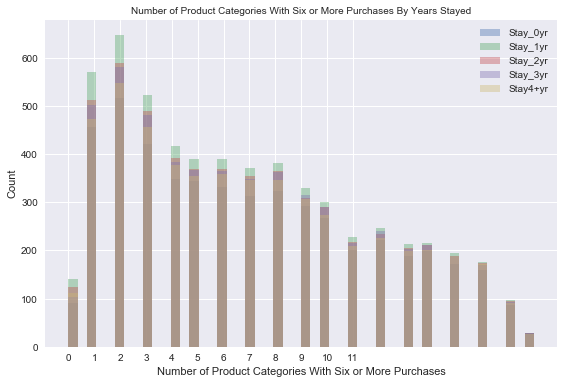

In [87]:
plt.gcf().clear()

for key, value in staycurrcityDfs.items():

#Number of categories with 6 or more purchases by years in current city
    value.groupby(by='User_ID')['6+_Cat_Count'].mean().hist(bins = 50, label = key, alpha =.4)
    plt.xlabel('Number of Product Categories With Six or More Purchases')
    x = range(0,12)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Product Categories With Six or More Purchases By Years Stayed', fontsize = 10)
    plt.legend(loc = 'upper right')
    
    plt.tight_layout()
    i +=1

plt.show()

In [88]:
print('Starting analysis by marital status at: ', datetime.datetime.now())

Starting analysis by marital status at:  2018-04-12 12:58:51.964528


In [89]:
# Hot one encoding marital status data for visualization purposes

# Define an array containing gender column data from df
ms = np.array(trainDf['Marital_Status']) 

# integer encode the gender data from the gender array
label_encoder = LabelEncoder()
ms_integer_encoded = label_encoder.fit_transform(ms)
print(ms_integer_encoded)

# binary encode the gender data from the integer encoded data
onehot_encoder = OneHotEncoder(sparse=False)
ms_integer_encoded = ms_integer_encoded.reshape(len(ms_integer_encoded), 1)
ms_onehot_encoded = onehot_encoder.fit_transform(ms_integer_encoded)
print(ms_onehot_encoded)
print(type(ms_onehot_encoded))

# Converts the hot one encoded data into a dataframe with columns 'F' for female and 'M' for male
dfms = pd.DataFrame(data=ms_onehot_encoded, columns=['Married','Single'])
#print(dfms)

[0 0 0 ..., 0 0 0]
[[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 ..., 
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]]
<class 'numpy.ndarray'>


In [90]:
dff = pd.concat([trainDf, dfms], axis=1, join='inner')

In [91]:
dff.columns[96:97]

Index([], dtype='object')

In [92]:
married = dff.columns[96:98]

marriedDfs = {}
marriedLst = []

for item in married:
    marriedDfs[item] = dff[dff[item]==1]
    marriedLst.append(dff[dff[item]==1])
    
marriedStats = {}
marriedStat = {}


for key, value in marriedDfs.items():
    
    temps = {}
    temp = {}


    temps['AveragePurchaseAmount'] = np.mean(value['Purchase_Amount'])

    temps['TotalPurchaseAmount'] = value.Purchase_Amount.sum()

    temps['NumberPurchases'] = value.Purchase_Amount.count()

    temps['AverageNumberPurchases'] = np.mean(value.groupby(by='User_ID')['Purchase_Amount'].count())

    temps['AverageTotalPurchaseAmount'] = value.groupby(by='User_ID')['Purchase_Amount'].sum().mean()

    temps['MaxPurchaseAmountUsers'] = np.max(value['Purchase_Amount'])
    
    temps['MinPurchaseAmountUsers'] = np.min(value['Purchase_Amount'])
    
    temps['MaxNumberPurchasesUsers'] = np.max(value.groupby(by='User_ID')['Purchase_Amount'].count())
    
    temps['MinNumberPurchasesUsers'] = np.min(value.groupby(by='User_ID')['Purchase_Amount'].count())
    
    temp['AveragePurchaseAmountUser'] = value.groupby(by='User_ID')['Purchase_Amount'].mean()
    
    temp['NumberOfPurchasesUser'] = value.groupby(by='User_ID')['Purchase_Amount'].count().sort_values(ascending=False)
    
    marriedStats[key] = temps
    marriedStat[key] = temp

    
i = 0

for key, value in marriedStats.items():
    print('Statistics by marital status: ', key)
    
    print(marriedLst[i].Purchase_Amount.describe(), "\n")
    i += 1
    
    
    for k, v in value.items():
        print(k, ": ", v)
    print('\n')

In [93]:
trainDf.groupby('Marital_Status')['User_ID'].nunique()

Marital_Status
0    3417
1    2474
Name: User_ID, dtype: int64

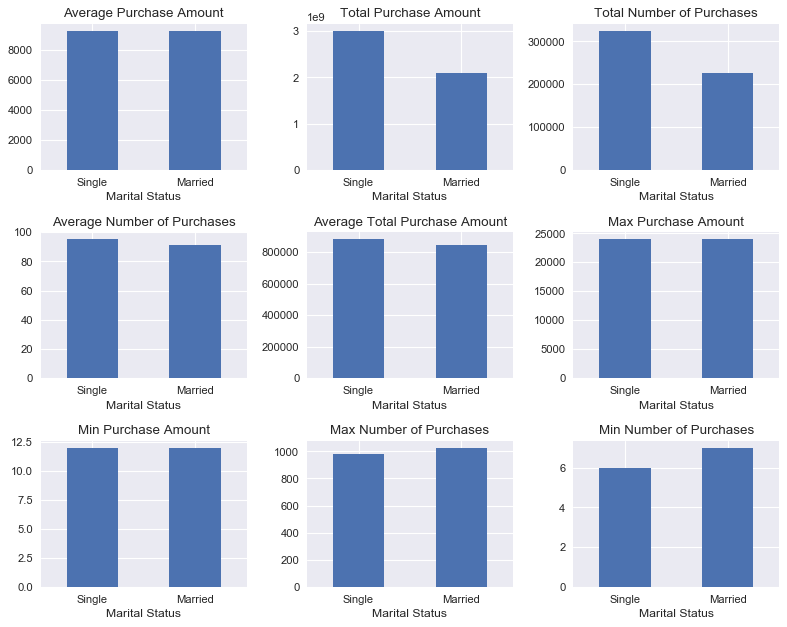

In [94]:
plt.gcf().clear()
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

#Plots Average Purchase Amount by marital status
plt.subplot(3,3,1)
df = trainDf.groupby(by='Marital_Status')['Purchase_Amount'].mean()
df.plot(kind='bar', title='Average Purchase Amount')
plt.xticks([0, 1], ['Single', 'Married'], rotation='horizontal')
plt.xlabel('Marital Status')


#Plots Total Purchase Amount by marital status
plt.subplot(3,3,2)
df = trainDf.groupby(by='Marital_Status')['Purchase_Amount'].sum()
df.plot(kind='bar', title = 'Total Purchase Amount')
plt.xticks([0, 1], ['Single', 'Married'], rotation='horizontal')
plt.xlabel('Marital Status')

#Plots Total Number of Purchases by marital status
plt.subplot(3,3,3)
df = trainDf.groupby(by=['Marital_Status'])['Purchase_Amount'].count()
df.plot(kind='bar', title = 'Total Number of Purchases')
plt.xticks([0, 1], ['Single', 'Married'], rotation='horizontal')
plt.xlabel('Marital Status')

#Plots Average Number of Purchases by marital status
plt.subplot(3,3,4)
tempDf = trainDf
df0 = trainDf.groupby(by='User_ID')['Purchase_Amount'].count().to_frame().reset_index()
df0.columns = ["User_ID", 'NumberPurchaseCount']
df1 = tempDf.merge(df0, on='User_ID')
df2 = df1.groupby(by = ["Marital_Status","User_ID"])['NumberPurchaseCount'].mean()
df3 = df2.groupby('Marital_Status').mean()
df3.plot(kind='bar', title ='Average Number of Purchases')
plt.xticks([0, 1], ['Single', 'Married'], rotation='horizontal')
plt.xlabel('Marital Status')

#Plots Average Total Purchase Amount by marital status
plt.subplot(3,3,5)
df = trainDf.groupby(by=['Marital_Status','User_ID'])['Purchase_Amount'].sum()
df2 = df.groupby(by='Marital_Status').mean()
df2.plot(kind='bar', title='Average Total Purchase Amount')
plt.xticks([0, 1], ['Single', 'Married'], rotation='horizontal')
plt.xlabel('Marital Status')

#Plots Maximumn Purchase Amount by marital status
plt.subplot(3,3,6)
df = trainDf.groupby('Marital_Status')['Purchase_Amount'].max()
df.plot(kind='bar', title='Max Purchase Amount')
plt.xticks([0, 1], ['Single', 'Married'], rotation='horizontal')
plt.xlabel('Marital Status')

#Plots Minimum Purchase Amount by marital status
plt.subplot(3,3,7)
df = trainDf.groupby('Marital_Status')['Purchase_Amount'].min()
df.plot(kind='bar', title='Min Purchase Amount')
plt.xticks([0, 1], ['Single', 'Married'], rotation='horizontal')
plt.xlabel('Marital Status')

#Plots Maximumn Number of Purchases by marital status
plt.subplot(3,3,8)
df = trainDf.groupby(by = ['Marital_Status','User_ID'])['Purchase_Amount'].count()
df1 = df.groupby('Marital_Status').max()
df1.plot(kind='bar', title='Max Number of Purchases')
plt.xticks([0, 1], ['Single', 'Married'], rotation='horizontal')
plt.xlabel('Marital Status')

#Plots Minimum Number of Purchases by marital status
plt.subplot(3,3,9)
df = trainDf.groupby(by = ['Marital_Status','User_ID'])['Purchase_Amount'].count()
df1 = df.groupby('Marital_Status').min()
df1.plot(kind='bar', title='Min Number of Purchases')
plt.xticks([0, 1], ['Single', 'Married'], rotation='horizontal')
plt.xlabel('Marital Status')

plt.tight_layout()
plt.show()

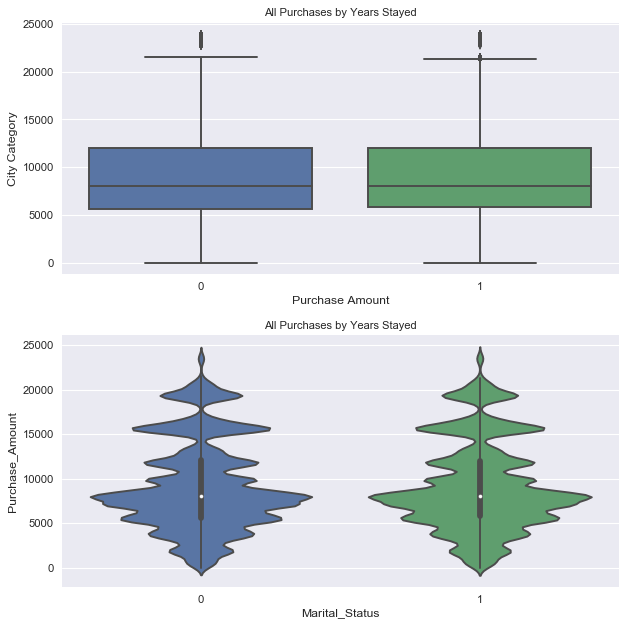

In [95]:
plt.gcf().clear()
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

#Box and whiskers of purchase amount by marital status
plt.subplot(2,1,1)
sns.boxplot(y = 'Purchase_Amount', x='Marital_Status', data=trainDf)
plt.xlabel('Purchase Amount')
plt.ylabel('City Category')
plt.title('All Purchases by Years Stayed', fontsize = 10)

#Violinplot of purchase amount by marital status
plt.subplot(2,1,2)
sns.violinplot( y='Purchase_Amount', x='Marital_Status', data=trainDf)
plt.title('All Purchases by Years Stayed', fontsize = 10)

plt.tight_layout()
plt.show()

In [96]:
hold = trainDf.groupby('User_ID')['Purchase_Amount'].sum()
hold = hold.to_frame().reset_index().rename(columns={'Purchase_Amount': 'TotalPurchaseAmount'})
holdDf = trainDf
hold = pd.merge(hold, holdDf, on='User_ID', how='outer')
hold = hold.groupby(['User_ID', 'Marital_Status'])['TotalPurchaseAmount'].mean()
hold = hold.to_frame().reset_index().rename(columns={'Purchase_Amount': 'TotalPurchaseAmount'})

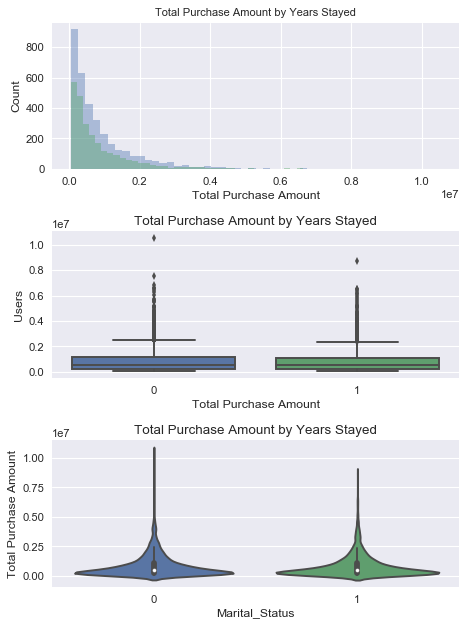

In [97]:
plt.gcf().clear()
plt.figure(num=None, figsize=(6, 8), dpi=80, facecolor='w', edgecolor='k')

# Histogram of total Purchase amount by marital status
plt.subplot(3,1,1)
hold.groupby('Marital_Status')['TotalPurchaseAmount'].hist(bins=50, alpha = .4)
plt.xlabel('Total Purchase Amount')
plt.ylabel('Count')
plt.legend(married, loc = 'upper right')
plt.title('Total Purchase Amount by Years Stayed', fontsize = 10)

#Box and whiskers of total Purchase amount by marital status
plt.subplot(3,1,2)
sns.boxplot(y = 'TotalPurchaseAmount', x='Marital_Status', data= hold)
plt.xlabel('Total Purchase Amount')
plt.ylabel('Users')
plt.title('Total Purchase Amount by Years Stayed')

#Violin plot of total Purchase amount by marital status
plt.subplot(3,1,3)
sns.violinplot(y = 'TotalPurchaseAmount',  x='Marital_Status', data= hold)
plt.title('Total Purchase Amount by Years Stayed')
plt.ylabel('Total Purchase Amount')

plt.tight_layout()
plt.show()

In [98]:
plt.gcf().clear()

alpha = .4
titles = trainDf.columns[14:21].tolist()
i = 0

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='white', edgecolor='k')

for key, value in marriedDfs.items():
    
    #Purchase amount by marital status
    plt.subplot(3,2,1)
    value['Purchase_Amount'].hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Purchase Amount')
    plt.ylabel('Count')
    plt.title('All Purchases by Marital Status', fontsize = 10)
    
    #Average purchase amount by marital status
    plt.subplot(3,2,2)
    value.groupby(by='User_ID')['AvgPurchaseAmount'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Average Purchase Amount')
    plt.ylabel('Count')
    plt.title('Average Purchase Amount by Marital Status', fontsize = 10)
    
    #Total number of purchases by marital status
    plt.subplot(3,2,3)
    value.groupby(by='User_ID')['NumberPurchasesUser'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Products Purchased')
    plt.ylabel('Count')
    plt.title('Number of Products Purchased by Marital Status', fontsize = 10)

    # Number of unique categories purchased by marital status
    plt.subplot(3,2,4)
    value.groupby(by='User_ID')['Unqiue_Cat_Count'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Unique Product Categories')
    x = range(0,20)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Unique Product Categories Purchased by Marital Status', fontsize = 10)
    
    #Number of categories with two or more purchases by marital status
    plt.subplot(3,2,5)
    value.groupby(by='User_ID')['2-3_Cat_Count'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Product Categories With 2 or 3 Purchases')
    x = range(0,18)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Product Categories With 2 or 3 Purchases by Marital Status', fontsize = 10)
    
    #Number of categories with five or more purchases by marital status
    plt.subplot(3,2,6)
    value.groupby(by='User_ID')['4-5_Cat_Count'].mean().hist(bins = 50, label = key, alpha=alpha)
    plt.xlabel('Number of Product Categories With 4 or 5 Purchases')
    x = range(0,12)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Product Categories With 4 or 5 Purchases by Marital Status', fontsize = 10)
    
    plt.tight_layout()
    i +=1

plt.show()

In [99]:
plt.gcf().clear()

for key, value in marriedDfs.items():

#Number of categories with 6 or more purchases by marital status
    value.groupby(by='User_ID')['6+_Cat_Count'].mean().hist(bins = 50, label = key, alpha = .6)
    plt.xlabel('Number of Product Categories With Six or More Purchases')
    x = range(0,12)
    plt.xticks(x)
    plt.ylabel('Count')
    plt.title('Number of Product Categories With Six or More Purchases By Years Stayed', fontsize = 10)
    plt.legend(loc = 'upper right')
    plt.margins(.02)
    
    plt.tight_layout()
    i +=1

plt.show()

### Statistical Analysis

In [100]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

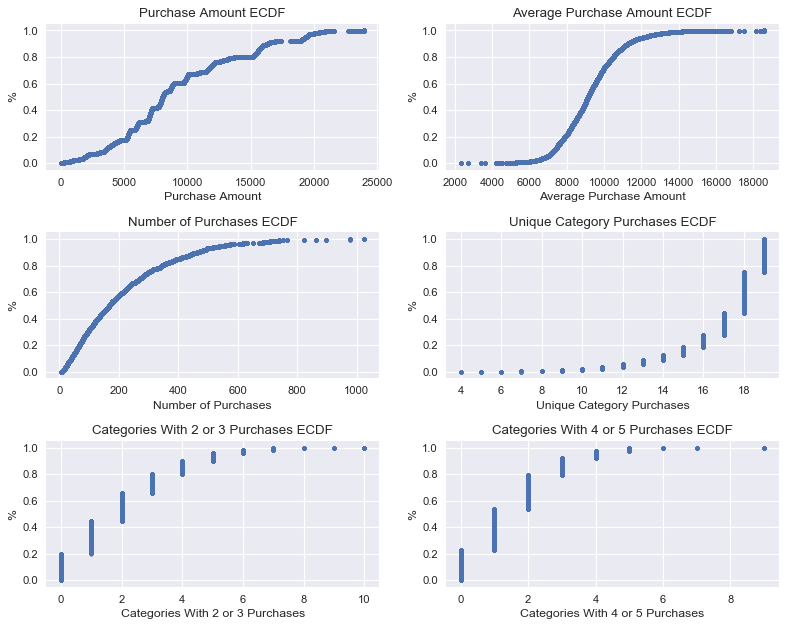

In [101]:
plt.gcf().clear()
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='white', edgecolor='k')

# Calculate and plot EDCF for Purchase Amount
x, y = ecdf(trainDf['Purchase_Amount'])
plt.subplot(3,2,1)
plt.plot(x, y, marker = '.', linestyle = 'none')
plt.xlabel('Purchase Amount')
plt.ylabel('%')
plt.title('Purchase Amount ECDF')

# Calculate and plot EDCF for average purchase amount
x, y = ecdf(trainDf['AvgPurchaseAmount'])
plt.subplot(3,2,2)
plt.plot(x, y, marker = '.', linestyle = 'none')
plt.xlabel('Average Purchase Amount')
plt.title('Average Purchase Amount ECDF')
plt.ylabel('%')

# Calculate and plot EDCF for number of purchases
x, y = ecdf(trainDf['NumberPurchasesUser'])
plt.subplot(3,2,3)
plt.plot(x, y, marker = '.', linestyle = 'none')
plt.xlabel('Number of Purchases')
plt.title('Number of Purchases ECDF')
plt.ylabel('%')

# Calculate and plot EDCF for number of unique category purchases
x, y = ecdf(trainDf['Unqiue_Cat_Count'])
plt.subplot(3,2,4)
plt.plot(x, y, marker = '.', linestyle = 'none')
plt.xlabel('Unique Category Purchases')
plt.title('Unique Category Purchases ECDF')
plt.ylabel('%')

# Calculate and plot EDCF for categories with 2+ purchases
x, y = ecdf(trainDf['2-3_Cat_Count'])
plt.subplot(3,2,5)
plt.plot(x, y, marker = '.', linestyle = 'none')
plt.title('Categories With 2 or 3 Purchases ECDF')
plt.xlabel('Categories With 2 or 3 Purchases')
plt.ylabel('%')

# Calculate and plot EDCF for categories with 5+ purchases
x, y = ecdf(trainDf['4-5_Cat_Count'])
plt.subplot(3,2,6)
plt.plot(x, y, marker = '.', linestyle = 'none')
plt.xlabel('Categories With 4 or 5 Purchases')
plt.title('Categories With 4 or 5 Purchases ECDF')
plt.ylabel('%')

# Display the plot
plt.tight_layout()
plt.show()

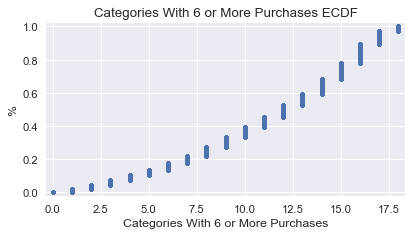

In [102]:
plt.gcf().clear()
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='white', edgecolor='k')

# Calculate and plot EDCF for categories with 5+ purchases
x, y = ecdf(trainDf['6+_Cat_Count'])
plt.subplot(3,2,6)
plt.plot(x, y, marker = '.', linestyle = 'none')
plt.margins(.02)
plt.title('Categories With 6 or More Purchases ECDF')
plt.xlabel('Categories With 6 or More Purchases')
plt.ylabel('%')

# Display the plot
plt.tight_layout()
plt.show()

In [103]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [104]:
trainDf['TotalPurchAmt'] = trainDf['AvgPurchaseAmount'] * trainDf['NumberPurchasesUser']

slope = 0.000114312478938
intercept = -3.68404125359


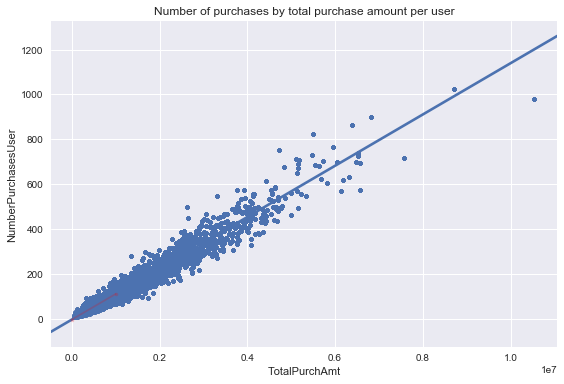

In [105]:
# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(trainDf['TotalPurchAmt'], trainDf['NumberPurchasesUser'], deg = 1)

# Print the results to the screen
print('slope =', a)
print('intercept =', b)

# Make theoretical line to plot
x = np.array([0,1000000])
y = a * x + b

sns.regplot(trainDf['TotalPurchAmt'], trainDf['NumberPurchasesUser'], marker='.')
_ = plt.plot(x, y, color= 'Red', marker='.', alpha = .2)
plt.title('Number of purchases by total purchase amount per user')
plt.tight_layout()
plt.show()

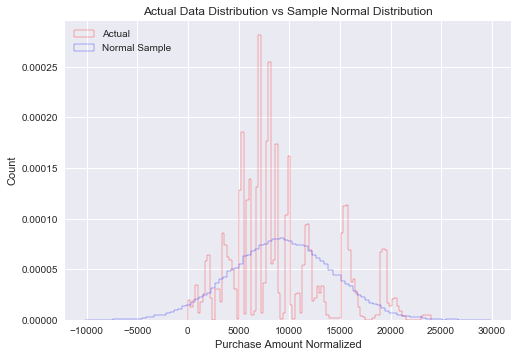

In [106]:
mean = np.mean(trainDf['Purchase_Amount'])
std = np.std(trainDf['Purchase_Amount'])

sample = np.random.normal(mean, std, 50000)

plt.hist(trainDf['Purchase_Amount'],normed=True, histtype='step', bins=100, color='Red')

plt.hist(sample, normed=True, histtype='step', bins = 100, color='Blue')

plt.title('Actual Data Distribution vs Sample Normal Distribution')
plt.legend(['Actual', 'Normal Sample'])

plt.xlabel("Purchase Amount Normalized")
plt.ylabel('Count')

plt.show()

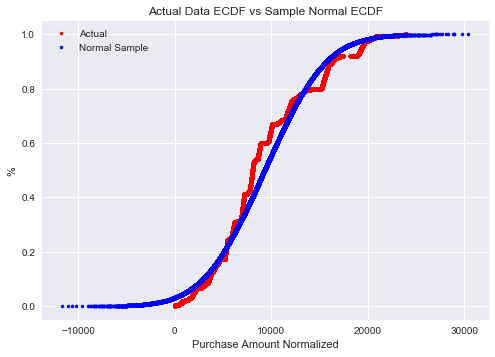

In [107]:
sample = np.random.normal(mean, std, 50000)

x, y = ecdf(trainDf['Purchase_Amount'])
xs, ys = ecdf(sample)

plt.plot(x, y, marker = '.', linestyle = 'none', color='red')

plt.plot(xs, ys, marker='.', linestyle='none', color = 'blue')

plt.title('Actual Data ECDF vs Sample Normal ECDF')
plt.legend(['Actual', 'Normal Sample'])

plt.xlabel("Purchase Amount Normalized")
plt.ylabel('%')

plt.show()

In [108]:
print('Exploratory data analysis completed at : ', datetime.datetime.now())

Exploratory data analysis completed at :  2018-04-12 13:00:21.923273
